In [2]:
from allensdk.core.nwb_data_set import NwbDataSet
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
np.set_printoptions(threshold=sys.maxsize)
plt.rcParams['agg.path.chunksize'] = 10000



In [3]:
cell_num = 471077853
# cell_num = 485835016
cell_num = 487664663
cell_num = 485835053

In [4]:
# if you ran the examples above, you will have a NWB file here
file_name = f'./cell_files/{cell_num}_ephys.nwb'
data_set = NwbDataSet(file_name)

sweep_numbers = sorted(data_set.get_experiment_sweep_numbers())
sweep_number = sweep_numbers[0] 
sweep_data = data_set.get_sweep(sweep_number)
# # spike times are in seconds relative to the start of the sweep
# spike_times = data_set.get_spike_times(sweep_number)

# # stimulus is a numpy array in amps
# stimulus = sweep_data['stimulus']

# # response is a numpy array in volts
# reponse = sweep_data['response']

# # sampling rate is in Hz
sampling_rate = sweep_data['sampling_rate']
print(1/sampling_rate * 1000)

# # start/stop indices that exclude the experimental test pulse (if applicable)
# index_range = sweep_data['index_range']

0.005


In [6]:
long_square_drop = [49, 40, 51, 52, 64]
noise_1_drop = [55, 57, 59]
noise_2_drop = [58, 60]
ramp_drop = [5, 6]
ramp_to_rheobase_drop = [102, 103]
short_square_drop = [22, 23, 24, 25, 78]
short_square_triple_drop = [79, 80, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]
sq_0_5ms_drop = [63]
sq_2s_drop = [66, 68, 69, 72, 73, 75, 76, 77]

In [7]:
sweeps_to_keep = []
sweeps_to_drop = long_square_drop + noise_1_drop + noise_2_drop + ramp_drop + ramp_to_rheobase_drop + short_square_drop + short_square_triple_drop + sq_0_5ms_drop + sq_2s_drop
sweeps_to_drop = ['noise_1_drop', 'noise_2_drop', 'long_square_drop', 'Ramp to Rheobase',\
                  'ramp_to_rheobase_drop', 'short_square_drop', 'short_square_triple_drop' + 'sq_0_5ms_drop', 'sq_2s_drop']
for sweep in sweep_numbers:
    # if not (sweep in sweeps_to_drop):
    sweeps_to_keep.append(sweep)
print(sweeps_to_keep)

[4, 5, 6, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 32, 33, 34, 35, 36, 37, 38, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 52, 57, 58, 63, 65, 66, 67, 70]


In [8]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['font.sans-serif'] = "Arial"
plt.rcParams['font.family'] = "sans-serif"
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

tick_major = 6
tick_minor = 4
plt.rcParams["xtick.major.size"] = tick_major
plt.rcParams["xtick.minor.size"] = tick_minor
plt.rcParams["ytick.major.size"] = tick_major
plt.rcParams["ytick.minor.size"] = tick_minor

font_small = 12
font_medium = 13
font_large = 14
plt.rc('font', size=font_small)          # controls default text sizes
plt.rc('axes', titlesize=font_medium)    # fontsize of the axes title
plt.rc('axes', labelsize=font_medium)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=font_small)    # fontsize of the tick labels
plt.rc('legend', fontsize=font_small)    # legend fontsize
plt.rc('figure', titlesize=font_large)   # fontsize of the figure title

In [9]:
def cm_to_in(cm):
    return cm/2.54

def plot_stim_volts_pair(stim, volts, title_stim, title_volts, file_path_to_save=None):
    plt.figure(figsize=(cm_to_in(16), cm_to_in(12)))
    plt.subplot(2, 1, 1)
    plt.title(title_stim)
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (nA)')
    plt.plot(stim, color='black', linewidth=0.7)
    plt.subplot(2, 1, 2)
    plt.title('Voltage Response '+title_volts)
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (mV)')
    plt.plot(volts, color='black')
    plt.tight_layout(pad=1)
    plt.show()
    if file_path_to_save:
        plt.savefig(file_path_to_save+'.pdf', format='pdf', dpi=1000, bbox_inches="tight")

In [10]:
import h5py

#sample_len = 100000
# dt = 0.025 #milliseconds
initial_ind = 150000
final_len = 30000
smooth_rate = 1

short_sq_ind = [150000, 270000]
short_sq_tri_81_ind = [360000, 480000]
short_sq_tri_82_ind = [370000, 460000]
short_sq_tri_83_ind = [370000, 460000]
short_sq_tri_84_ind = [380000, 440000]
short_sq_tri_85_ind = [380000, 440000]
long_sq_ind = [120000, 480000]
ramp_ind = [110000, 6200000]

ramp_to_rheo_ind = [initial_ind, 4550000]
noise_ind_1 = [initial_ind, 1300000]
noise_ind_2 = [1800000, 2800000]
noise_ind_3 = [3400000, 4400000]

full_noise_ind = [initial_ind, 4400000]

sq_0_5_ind = [initial_ind, 450000]
sq_2_ind = [130000, 700000]

stim_file_path = f'./stims/allen_data_stims_{cell_num}.hdf5'
volts_file_path = f'./target_volts/allen_data_target_volts_{cell_num}.hdf5'

In [11]:
# def sample(orig_list, dt, is_stim, sweep_rate):
#     sampling_rate = int(sweep_rate*dt/1000)
#     sampled_stim = []
#     #print('dt is', dt, 'ms')
#     #print('length is', len(orig_list)/sampling_rate)
#     for i in range(0, len(orig_list), sampling_rate):
#         sampled_stim.append(orig_list[i])
#     return sampled_stim, dt

def sample(orig_list, final_len, is_stim, sampling_rate):
    rate = int(len(orig_list)/final_len)
    sample_dt = rate*1/sampling_rate*1000
    if not rate:
        return orig_list, sample_dt
    print('dt for sampled stim: '+str(sample_dt)+' ms')
    sampled_stim = []
    for i in range(100, len(orig_list), rate):
        if is_stim:
            in_window_max = max(orig_list[i:i+rate])#-smooth_rate:int(i*rate)+smooth_rate])
            in_window_min = min(orig_list[i:i+rate])#-smooth_rate:int(i*rate)+smooth_rate])
            if in_window_min < 0:
                sampled_stim.append(in_window_min)
            else:
                sampled_stim.append(in_window_max)
        else:
            sampled_stim.append(max(orig_list[i:i+rate]))#-smooth_rate:int(i*rate)+smooth_rate]))
    return sampled_stim+[sampled_stim[-1] for i in range(final_len-len(sampled_stim))], sample_dt

def filtr(lis, ind_lis):
    return lis[ind_lis[0]:ind_lis[1]]

def plot_sampled(sweep_number, stimulus, response, sampled_stim, sampled_response):
    plt.figure(figsize=(cm_to_in(40), cm_to_in(30)))
    plt.subplot(3, 2, 1)
    plt.title('Stim number '+str(sweep_number))
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (nA)')
    plt.plot(stimulus, color='black', linewidth=0.7)
    plt.subplot(3, 2, 2)
    plt.title('Voltage Response')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (mV)')
    plt.plot(response, color='black')
    plt.subplot(3, 2, 3)
    plt.title('Stim number '+str(sweep_number))
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (nA)')
    plt.plot(sampled_stim, color='black', linewidth=0.7)
    plt.subplot(3, 2, 4)
    plt.title('Voltage Response')
    plt.xlabel('Time (ms)')
    plt.ylabel('Amplitude (mV)')
    plt.plot(sampled_response, color='black')
#     volts_grad = np.gradient(response)
#     sampled_grad = np.gradient(sampled_response)
#     plt.subplot(3, 2, 5)
#     plt.title('Voltage Gradient')
#     plt.xlabel('V (mV)')
#     plt.ylabel('dV/dt ')
#     plt.plot(response, volts_grad, color='black')
#     plt.subplot(3, 2, 6)
#     plt.title('Sampled Voltage Gradient')
#     plt.xlabel('V (mV)')
#     plt.ylabel('dV/dt ')
#     plt.plot(sampled_response, sampled_grad, color='black')
    plt.tight_layout(pad=1)
    plt.show()
    print('\n \n')

# def plot_sampled(sweep_number, response, sampled_response1):
#     volts_grad = np.gradient(response)
#     sampled_grad1 = np.gradient(sampled_response1)
#     plt.figure(figsize=(cm_to_in(40), cm_to_in(12)))
#     plt.subplot(1, 2, 1)
#     plt.title('Original Voltage Gradient')
#     plt.xlabel('V (mV)')
#     plt.ylabel('dV/dt ')
#     plt.plot(response, volts_grad, color='black')
#     plt.subplot(1, 2, 2)
#     plt.title('Sampled Voltage Gradient dt=0.025')
#     plt.xlabel('V (mV)')
#     plt.ylabel('dV/dt ')
#     plt.plot(sampled_response1, sampled_grad1, color='black')
#     plt.tight_layout(pad=1)
#     plt.show()
#     print('\n \n')

In [12]:
def read_and_plot(sweep_list):
    for sweep_number in sweep_list:
        sweep_number = sweep_number
        sweep_data = data_set.get_sweep(sweep_number)
        stimulus = sweep_data['stimulus']*10**9
        response = sweep_data['response']*10**3
        sampling_rate = sweep_data['sampling_rate']
        meta_data = data_set.get_sweep_metadata(sweep_number)
        stim_kind = meta_data['aibs_stimulus_name']
        print('Stim kind: '+stim_kind)
        if stim_kind in sweeps_to_drop:
            continue
        if 'Test' in stim_kind:
            print(sweep_number)
        if 'Long Square' in stim_kind:
            stimulus = filtr(stimulus, long_sq_ind)
            response = filtr(response, long_sq_ind)
        if 'Short Square - Triple' in stim_kind:
                if sweep_number == 81:
                    stimulus = filtr(stimulus, short_sq_tri_81_ind)
                    response = filtr(response, short_sq_tri_81_ind)
                if sweep_number == 82:
                    stimulus = filtr(stimulus, short_sq_tri_82_ind)
                    response = filtr(response, short_sq_tri_82_ind)
                if sweep_number == 83:
                    stimulus = filtr(stimulus, short_sq_tri_83_ind)
                    response = filtr(response, short_sq_tri_83_ind)
                if sweep_number == 84:
                    stimulus = filtr(stimulus, short_sq_tri_84_ind)
                    response = filtr(response, short_sq_tri_84_ind)
                if sweep_number == 85:
                    stimulus = filtr(stimulus, short_sq_tri_85_ind)
                    response = filtr(response, short_sq_tri_85_ind)
                else:
                    stimulus = filtr(stimulus, short_sq_tri_82_ind)
                    response = filtr(response, short_sq_tri_82_ind)
                    
                    
        if 'Short Square' in stim_kind and not ' - Triple' in stim_kind:
            stimulus = filtr(stimulus, short_sq_ind)
            response = filtr(response, short_sq_ind)
        if 'Ramp to Rheobase' in stim_kind:
            stimulus = filtr(stimulus, ramp_to_rheo_ind)
            response = filtr(response, ramp_to_rheo_ind)
        if 'Ramp' in stim_kind and not 'Rheobase' in stim_kind:
            stimulus = filtr(stimulus, ramp_ind)
            response = filtr(response, ramp_ind)
        if 'Square - 0.5ms Subthreshold' in stim_kind:
            stimulus = filtr(stimulus, sq_0_5_ind)
            response = filtr(response, sq_0_5_ind)
        if 'Square - 2s Suprathreshold' in stim_kind:
            stimulus = filtr(stimulus, sq_2_ind)
            response = filtr(response, sq_2_ind)
        if not 'Noise' in stim_kind and not 'Test' in stim_kind:
            sampled_stim, sample_dt = sample(stimulus, final_len, True, sampling_rate)
            sampled_response, sample_dt = sample(response, final_len, False, sampling_rate)
            plot_sampled(sweep_number, stimulus, response, sampled_stim, sampled_response)
        if 'Noise' in stim_kind:
            stimulus1 = filtr(stimulus, noise_ind_1)
            response1 = filtr(response, noise_ind_1)
            stimulus2 = filtr(stimulus, noise_ind_2)
            response2 = filtr(response, noise_ind_2)
            stimulus3 = filtr(stimulus, noise_ind_3)
            response3 = filtr(response, noise_ind_3)
            sampled_stim1, sample_dt1 = sample(stimulus1, final_len, True, sampling_rate)
            sampled_response1, sample_dt1 = sample(response1, final_len, False, sampling_rate)
            sampled_stim2, sample_dt2 = sample(stimulus2, final_len, True, sampling_rate)
            sampled_response2, sample_dt2 = sample(response2, final_len, False, sampling_rate)
            sampled_stim3, sample_dt3 = sample(stimulus3, final_len, True, sampling_rate)
            sampled_response3, sample_dt3 = sample(response3, final_len, False, sampling_rate)
            plot_sampled(sweep_number, stimulus1, response1, sampled_stim1, sampled_response1)
            plot_sampled(sweep_number, stimulus2, response2, sampled_stim2, sampled_response2)
            plot_sampled(sweep_number, stimulus3, response3, sampled_stim3, sampled_response3)


In [13]:
# read_and_plot(sweeps_to_keep)

In [14]:
def plot_detailed(sweep_number, stimulus, response):
    plt.figure(figsize=(cm_to_in(40), cm_to_in(12)))
    plt.subplot(1, 3, 1)
    plt.title('Stim number '+str(sweep_number))
    plt.xlabel('Time Steps')
    plt.ylabel('Amplitude (nA)')
    plt.plot(stimulus, color='black', linewidth=0.7)
    plt.subplot(1, 3, 2)
    plt.title('Voltage Response')
    plt.xlabel('Time Steps')
    plt.ylabel('Amplitude (mV)')
    plt.plot(response, color='black')
    plt.subplot(1, 3, 3)
    plt.title('First few steps of response')
    plt.xlabel('Time Steps')
    plt.ylabel('Amplitude (mV)')
    plt.plot(response[:int(len(response)*0.09)], color='black')
    
def show_redundant_stims(sweep_list):
    for sweep_number in sweep_list:
        sweep_data = data_set.get_sweep(sweep_number)
        stimulus = sweep_data['stimulus']*10**9
        response = sweep_data['response']*10**3
        sampling_rate = sweep_data['sampling_rate']
        meta_data = data_set.get_sweep_metadata(sweep_number)
        stim_kind = meta_data['aibs_stimulus_name']
        if 'Short Square - Triple' in stim_kind:
                if sweep_number == 81:
                    stimulus = filtr(stimulus, short_sq_tri_81_ind)
                    response = filtr(response, short_sq_tri_81_ind)
                if sweep_number == 82:
                    stimulus = filtr(stimulus, short_sq_tri_82_ind)
                    response = filtr(response, short_sq_tri_82_ind)
                if sweep_number == 83:
                    stimulus = filtr(stimulus, short_sq_tri_83_ind)
                    response = filtr(response, short_sq_tri_83_ind)
                if sweep_number == 84:
                    stimulus = filtr(stimulus, short_sq_tri_84_ind)
                    response = filtr(response, short_sq_tri_84_ind)
                if sweep_number == 85:
                    stimulus = filtr(stimulus, short_sq_tri_85_ind)
                    response = filtr(response, short_sq_tri_85_ind)
                else:
                    stimulus = filtr(stimulus, short_sq_tri_82_ind)
                    response = filtr(response, short_sq_tri_82_ind)
        if 'Short Square' in stim_kind and not '- Triple' in stim_kind:
            stimulus = filtr(stimulus, short_sq_ind)
            response = filtr(response, short_sq_ind)
        if 'Long Square' in stim_kind:
            stimulus = filtr(stimulus, long_sq_ind)
            response = filtr(response, long_sq_ind)
        if 'Ramp to Rheobase' in stim_kind:
            stimulus = filtr(stimulus, ramp_to_rheo_ind)
            response = filtr(response, ramp_to_rheo_ind)
        if 'Ramp' in stim_kind and not 'Rheobase' in stim_kind:
            stimulus = filtr(stimulus, ramp_ind)
            response = filtr(response, ramp_ind)
        if 'Square - 0.5ms Subthreshold' in stim_kind:
            stimulus = filtr(stimulus, sq_0_5_ind)
            response = filtr(response, sq_0_5_ind)
        if 'Square - 2s Suprathreshold' in stim_kind:
            stimulus = filtr(stimulus, sq_2_ind)
            response = filtr(response, sq_2_ind)
        if not 'Noise' in stim_kind and not 'Test' in stim_kind:
            sampled_stim, sample_dt = sample(stimulus, final_len, True, sampling_rate)
            sampled_response, sample_dt = sample(response, final_len, False, sampling_rate)
            plot_detailed(sweep_number, stimulus, response)
        if 'Noise' in stim_kind:
            stimulus1 = filtr(stimulus, noise_ind_1)
            response1 = filtr(response, noise_ind_1)
            stimulus2 = filtr(stimulus, noise_ind_2)
            response2 = filtr(response, noise_ind_2)
            stimulus3 = filtr(stimulus, noise_ind_3)
            response3 = filtr(response, noise_ind_3)
            sampled_stim1, sample_dt1 = sample(stimulus1, final_len, True, sampling_rate)
            sampled_response1, sample_dt1 = sample(response1, final_len, False, sampling_rate)
            sampled_stim2, sample_dt2 = sample(stimulus2, final_len, True, sampling_rate)
            sampled_response2, sample_dt2 = sample(response2, final_len, False, sampling_rate)
            sampled_stim3, sample_dt3 = sample(stimulus3, final_len, True, sampling_rate)
            sampled_response3, sample_dt3 = sample(response3, final_len, False, sampling_rate)
            plot_detailed(sweep_number, stimulus1, response1)
            plot_detailed(sweep_number, stimulus2, response2)
            plot_detailed(sweep_number, stimulus3, response3)

In [15]:
final_len

30000

Stim kind: Ramp
dt for sampled stim: 1.0150000000000001 ms
dt for sampled stim: 1.0150000000000001 ms


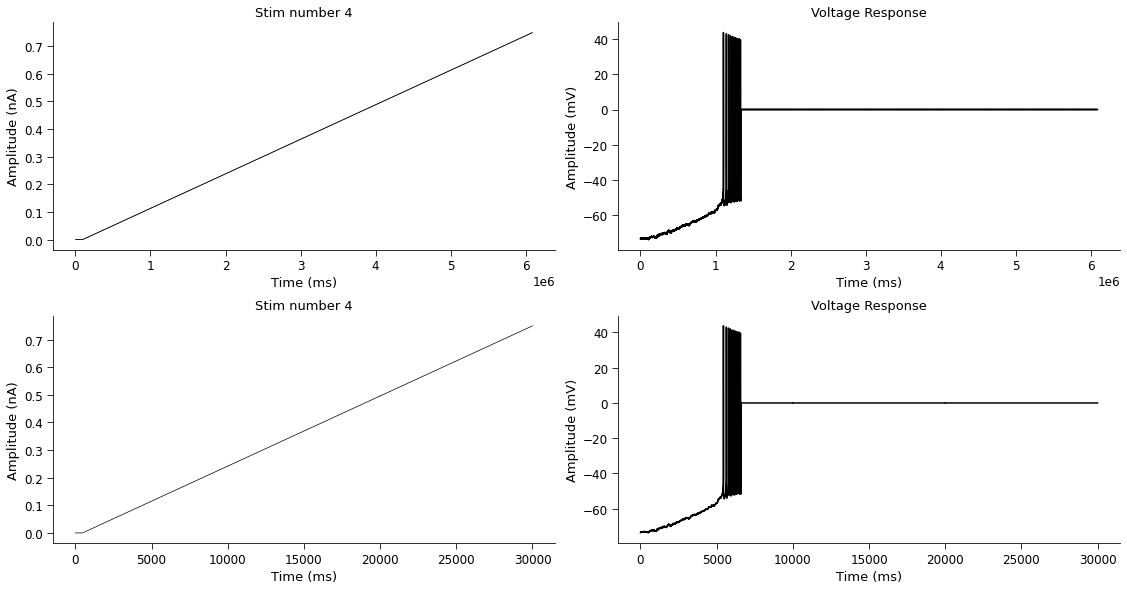


 

Stim kind: Ramp
dt for sampled stim: 1.0150000000000001 ms
dt for sampled stim: 1.0150000000000001 ms


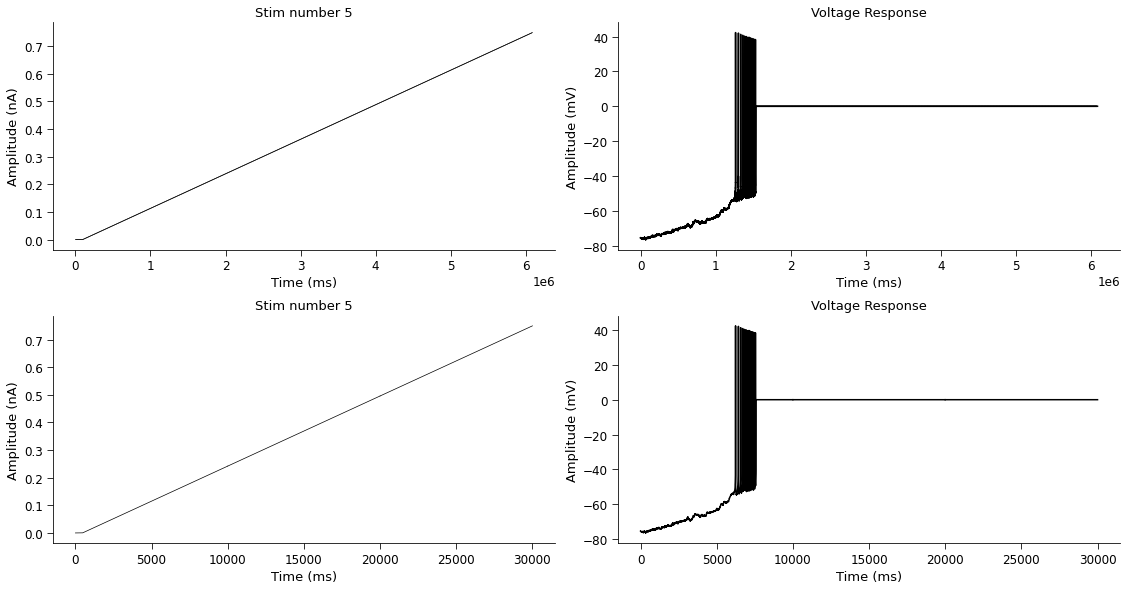


 

Stim kind: Ramp
dt for sampled stim: 1.0150000000000001 ms
dt for sampled stim: 1.0150000000000001 ms


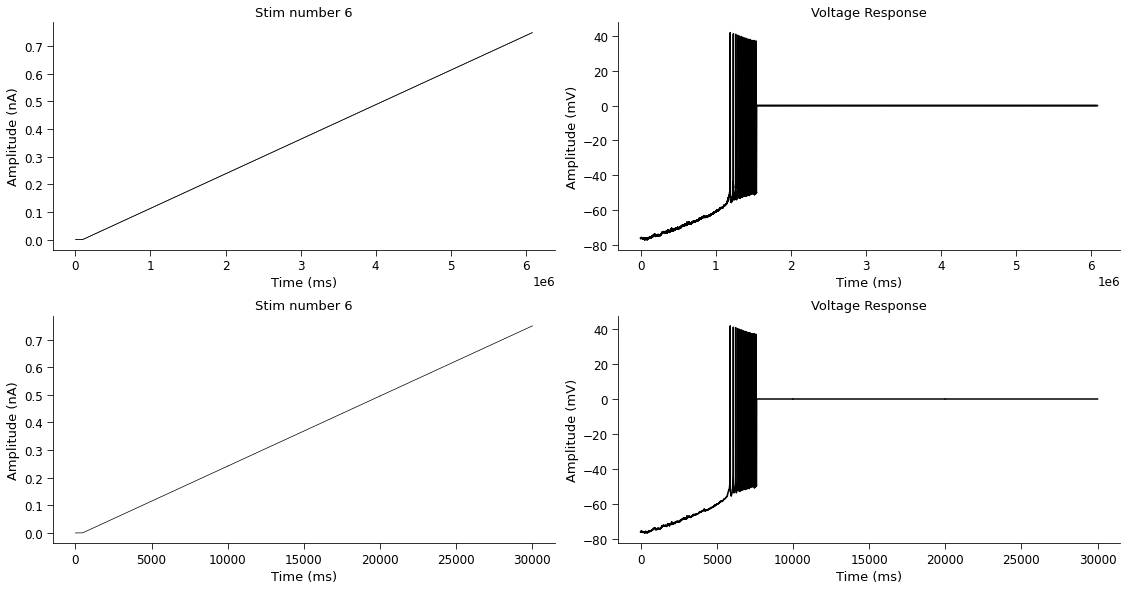


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


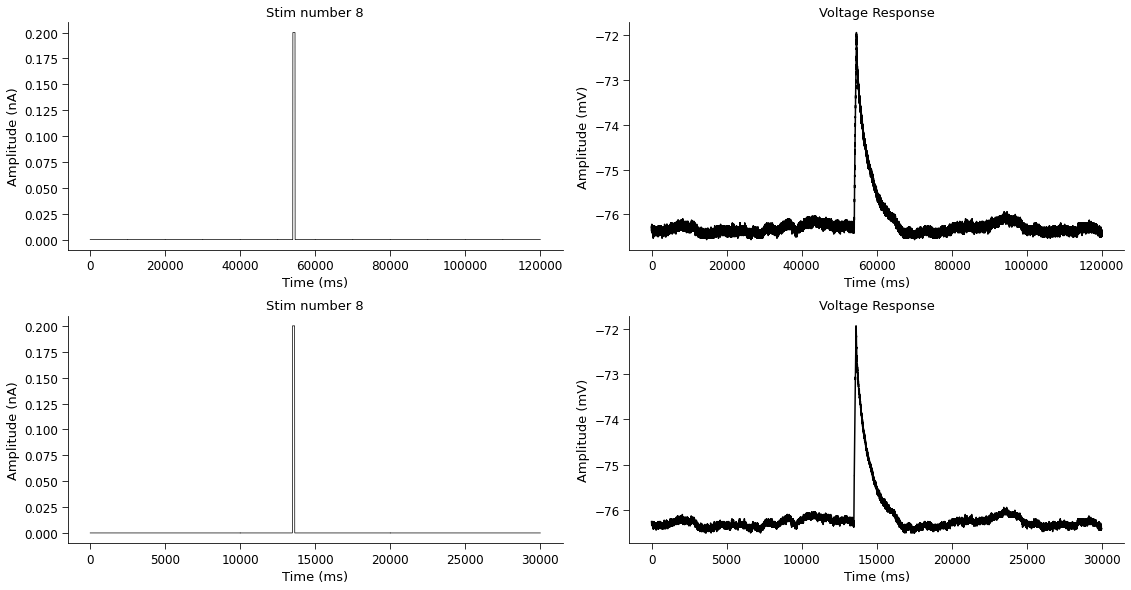


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


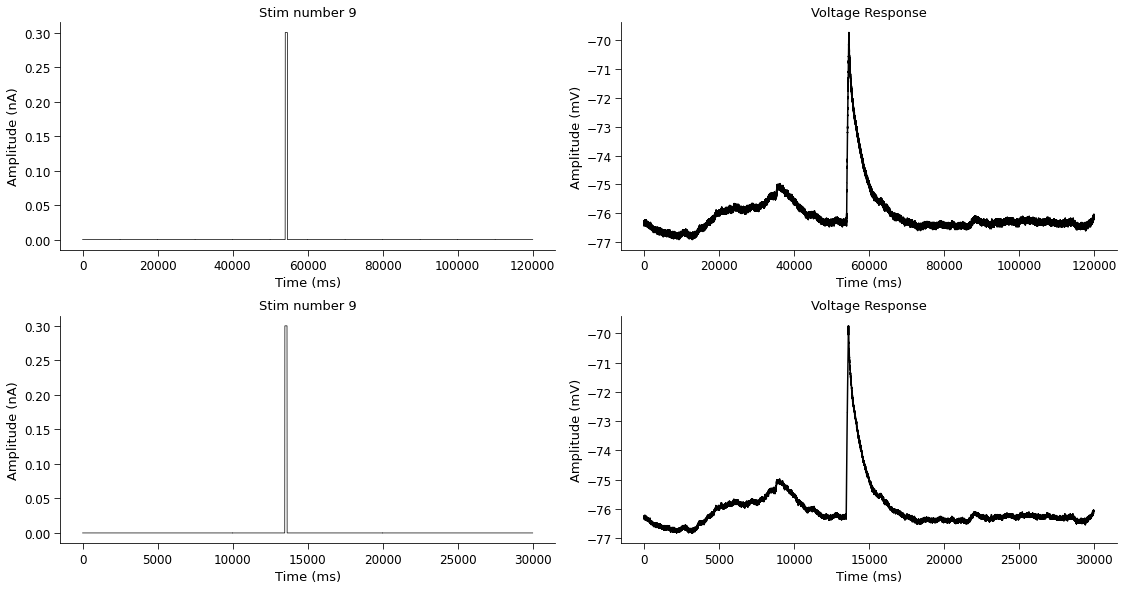


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


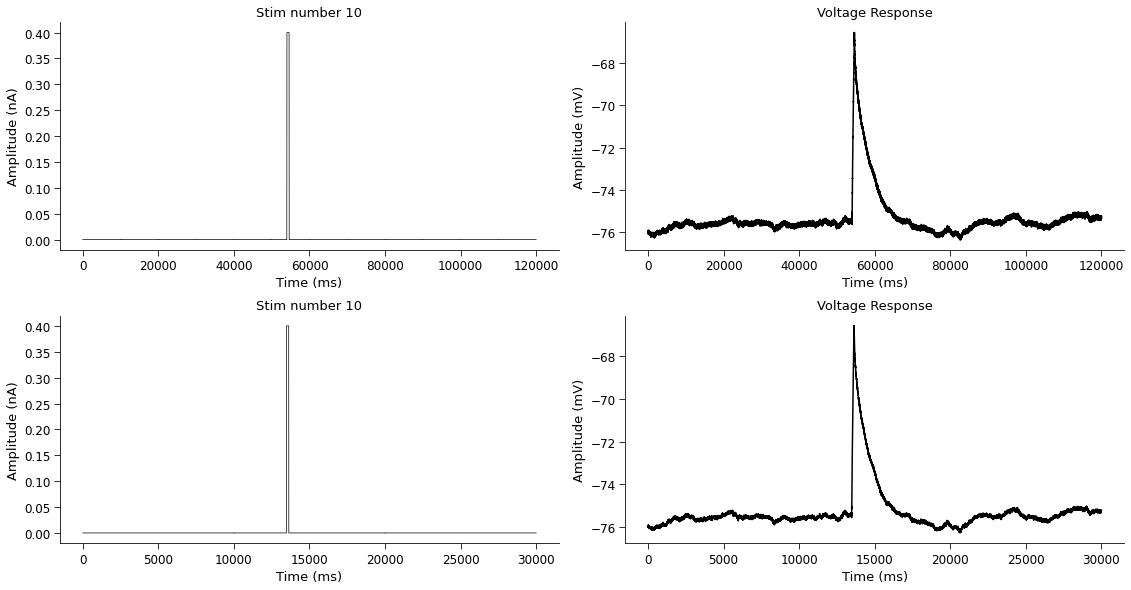


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


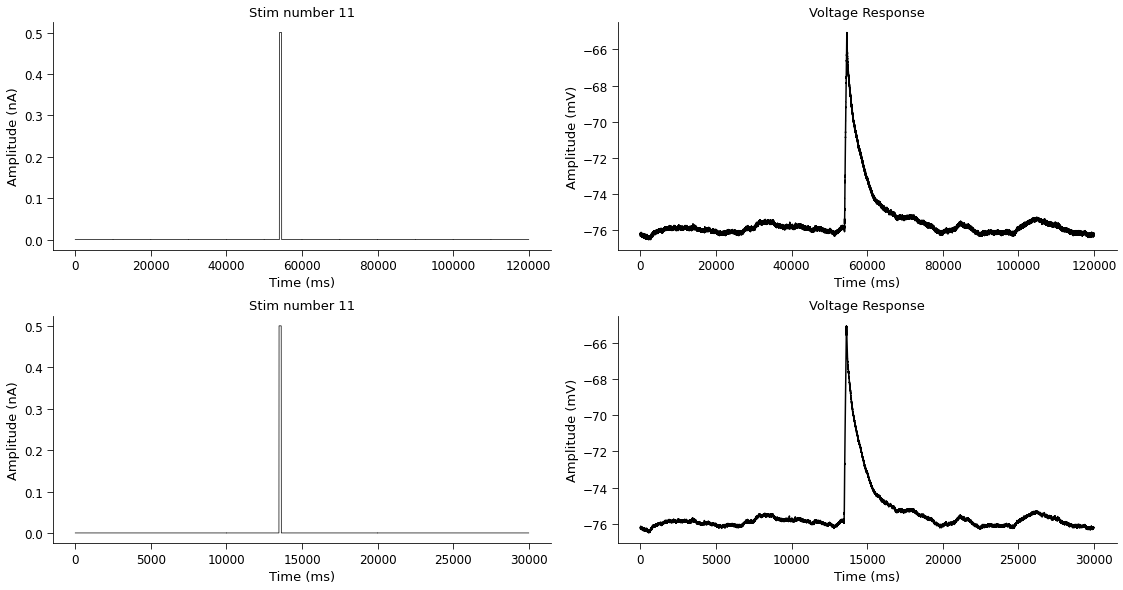


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


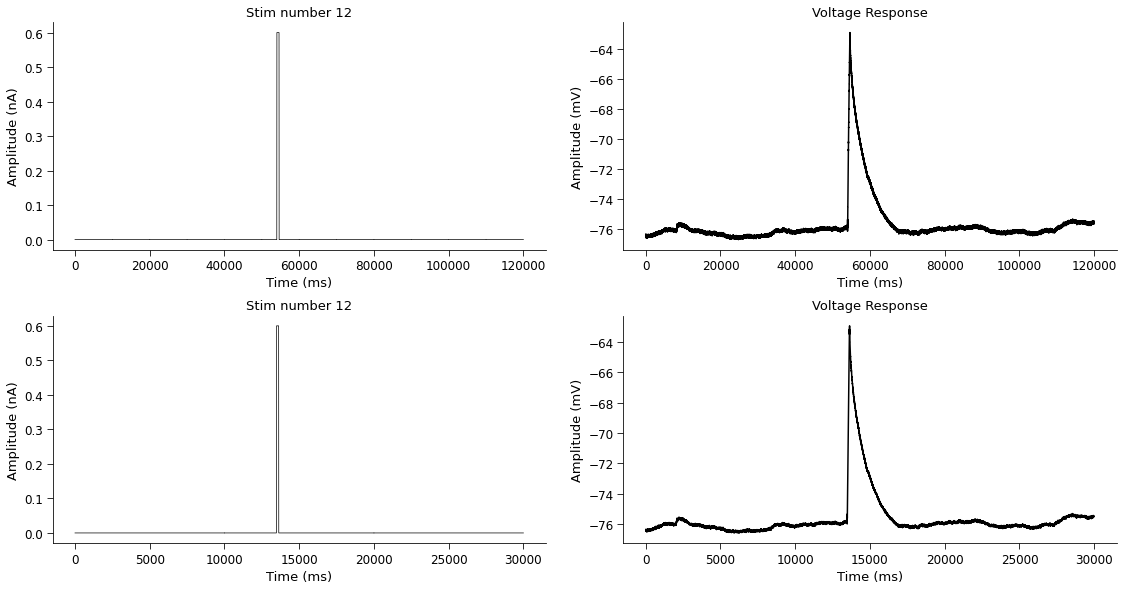


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


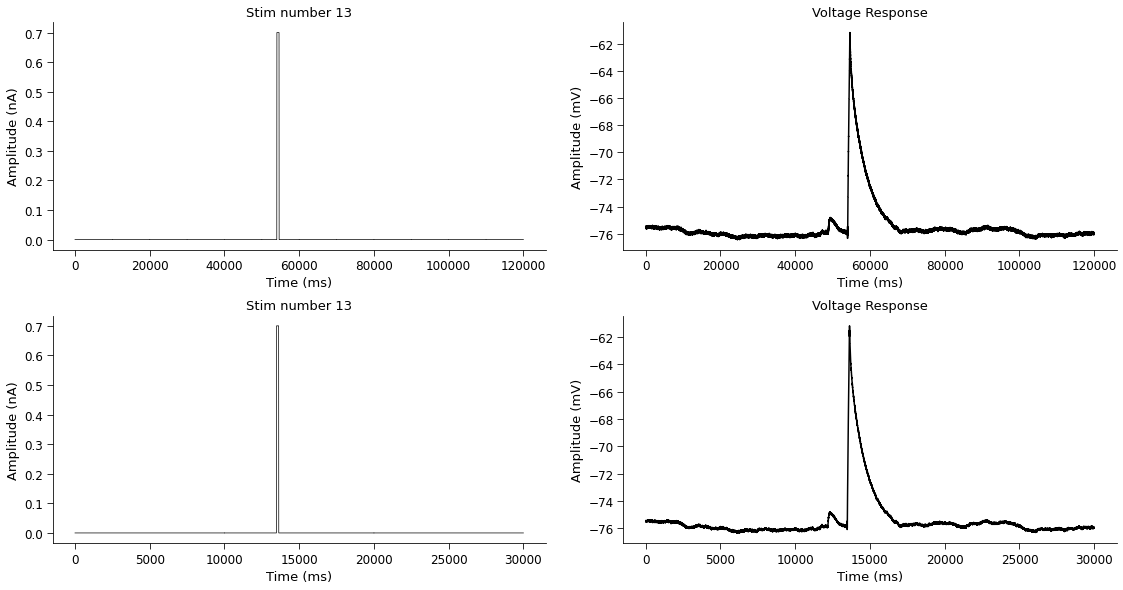


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


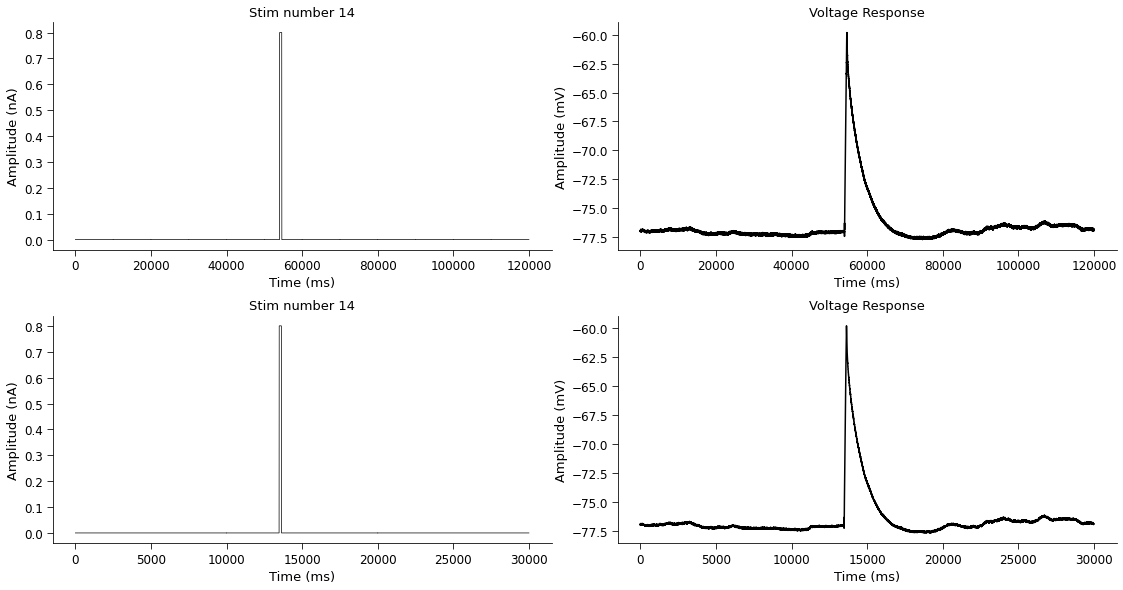


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


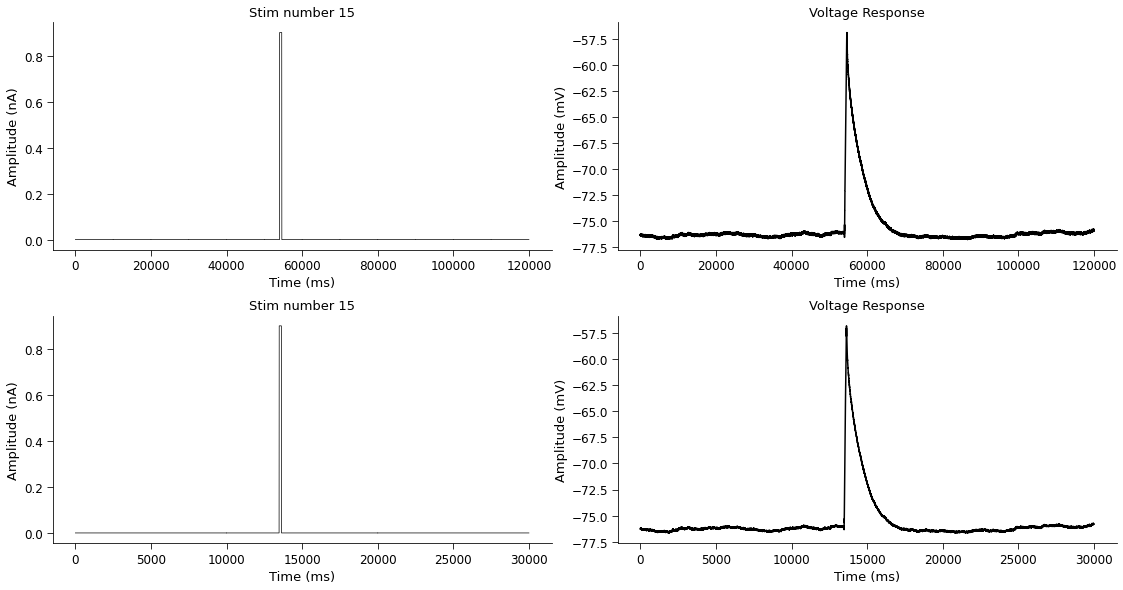


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


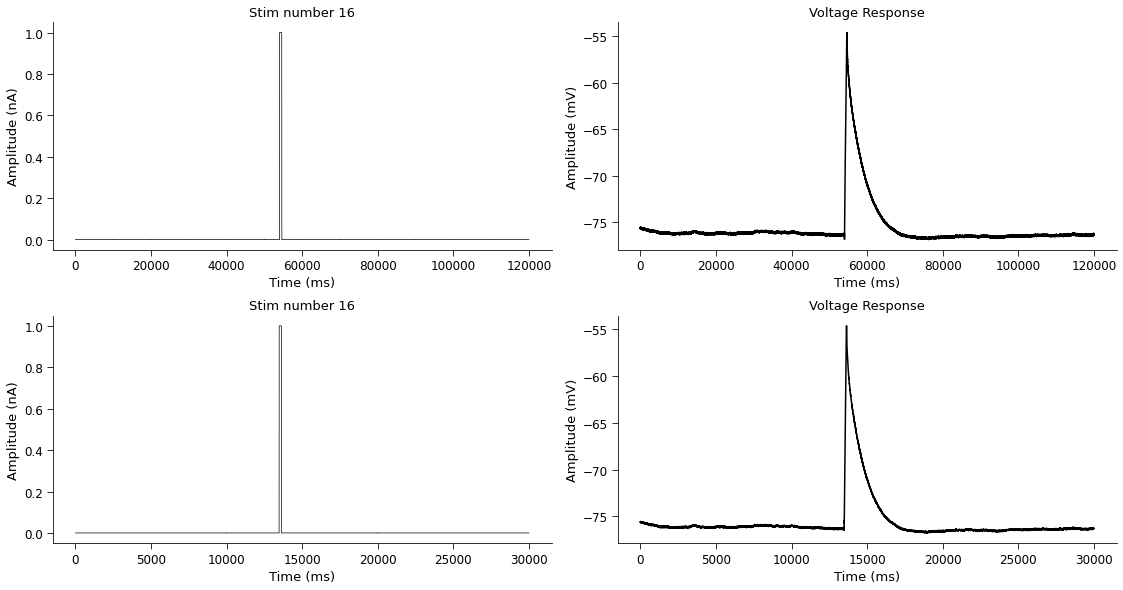


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


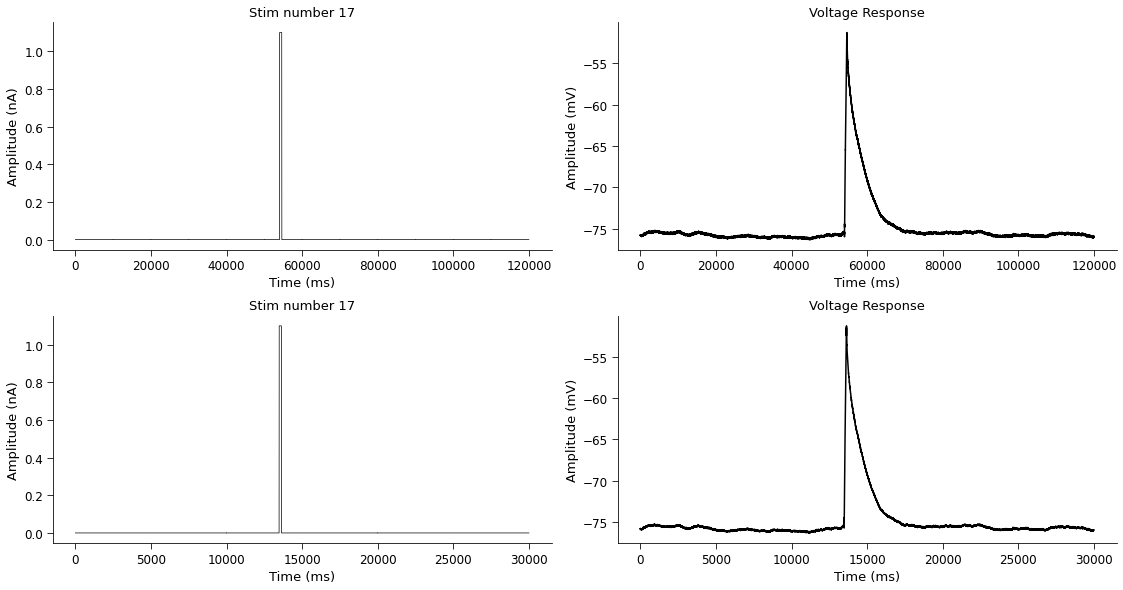


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


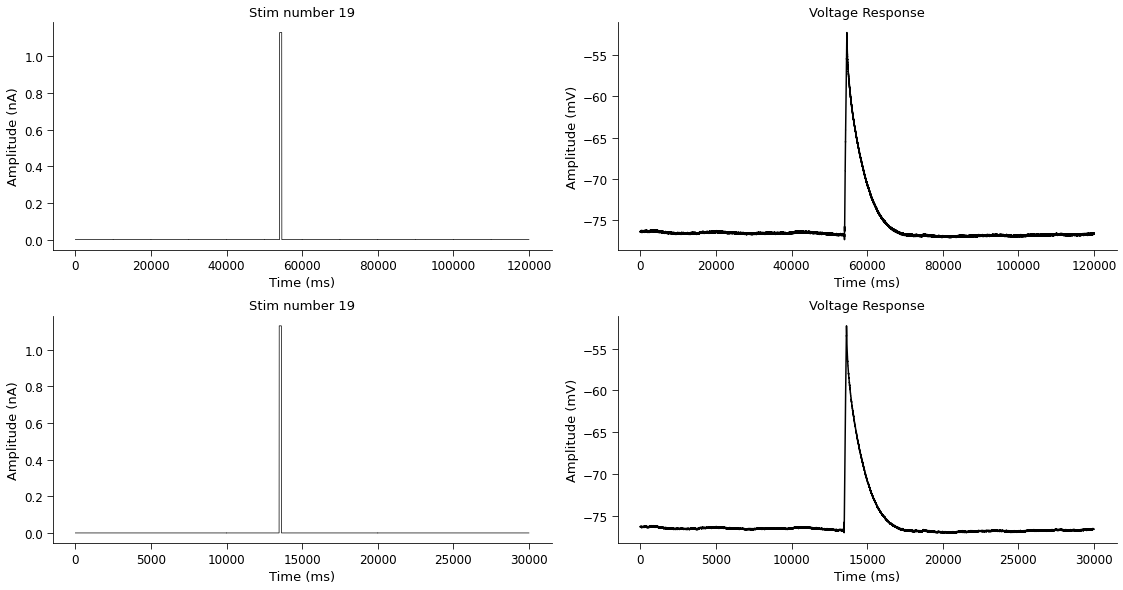


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


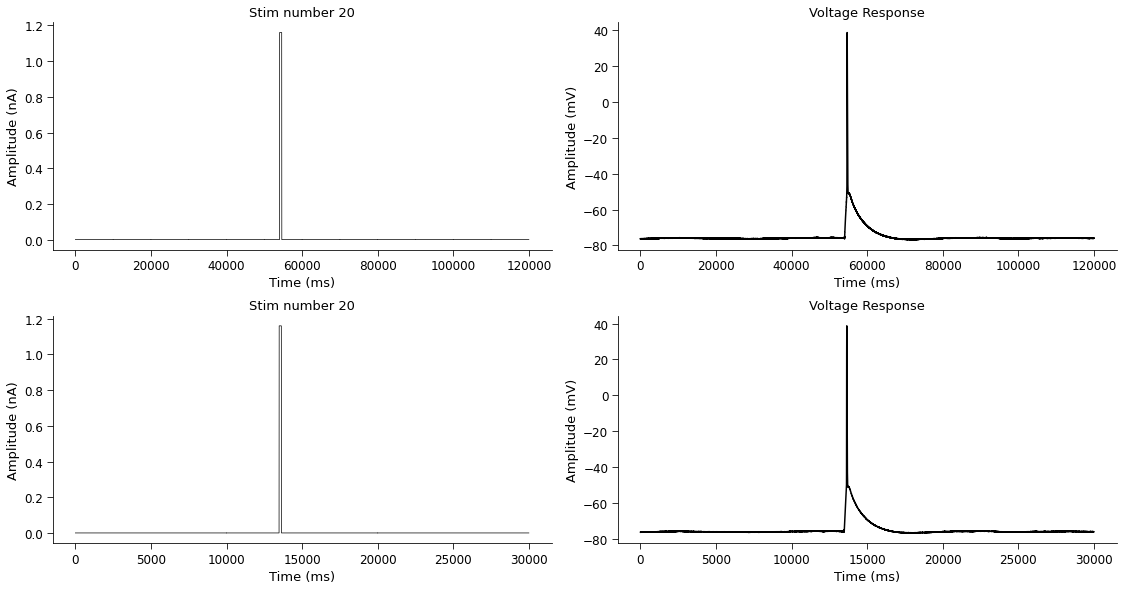


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


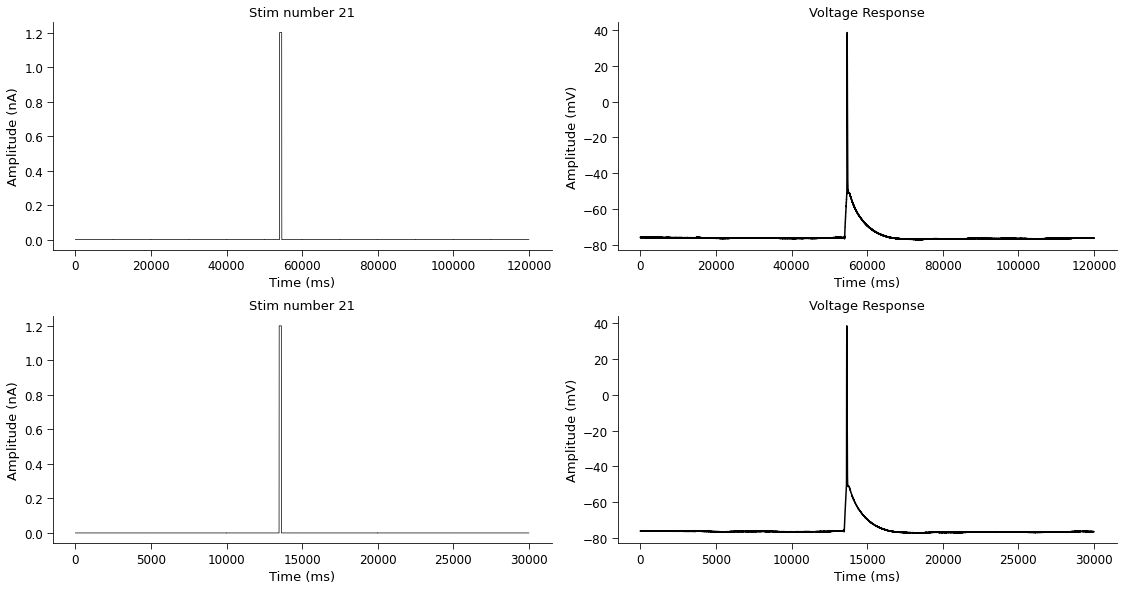


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


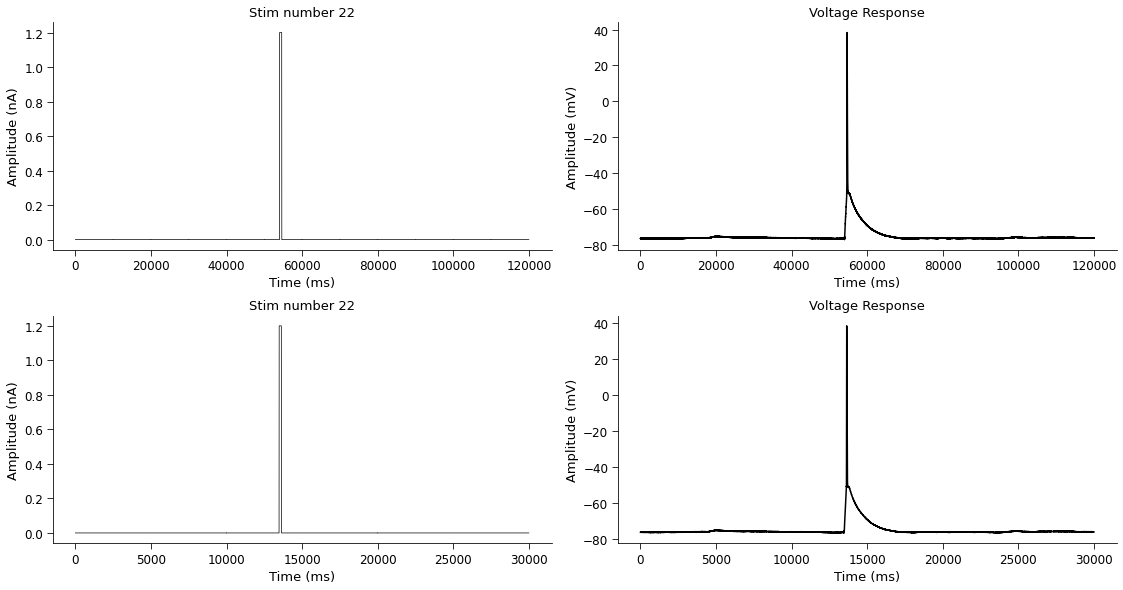


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


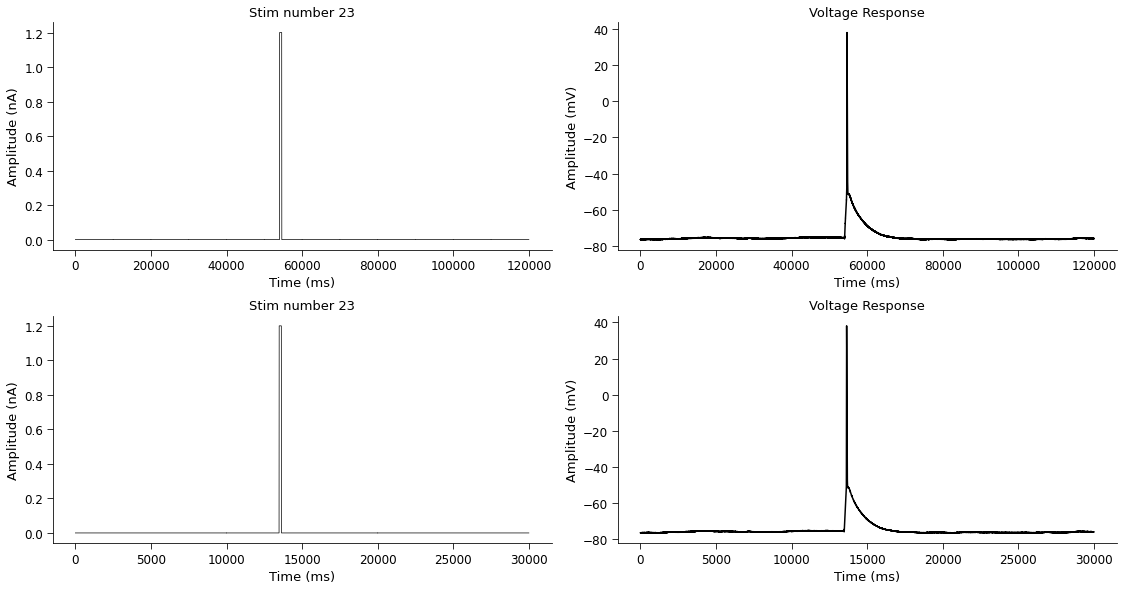


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


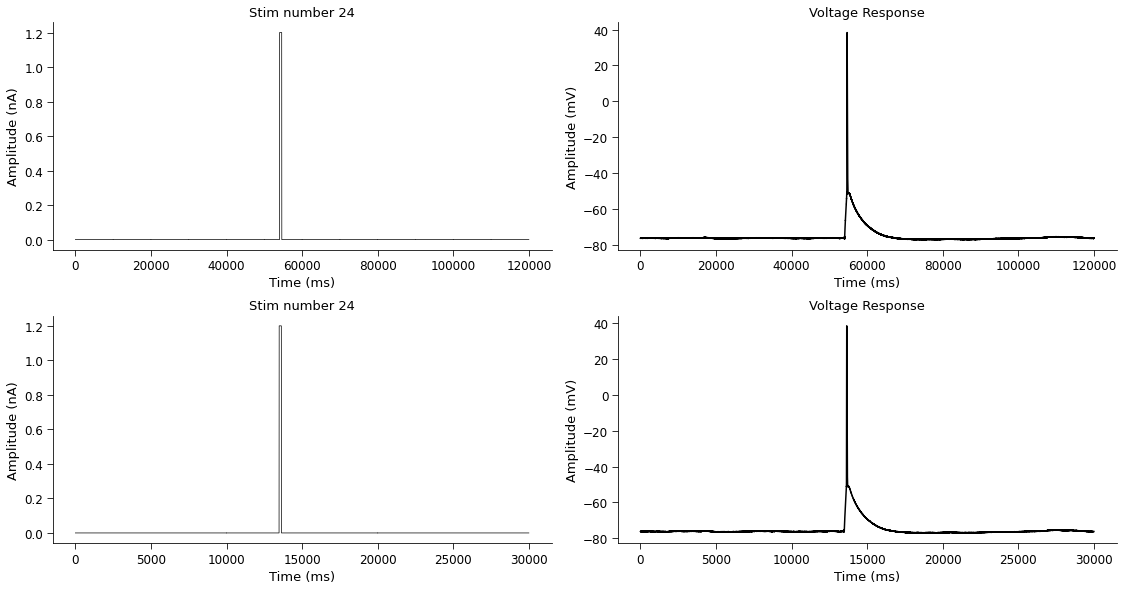


 

Stim kind: Short Square
dt for sampled stim: 0.02 ms
dt for sampled stim: 0.02 ms


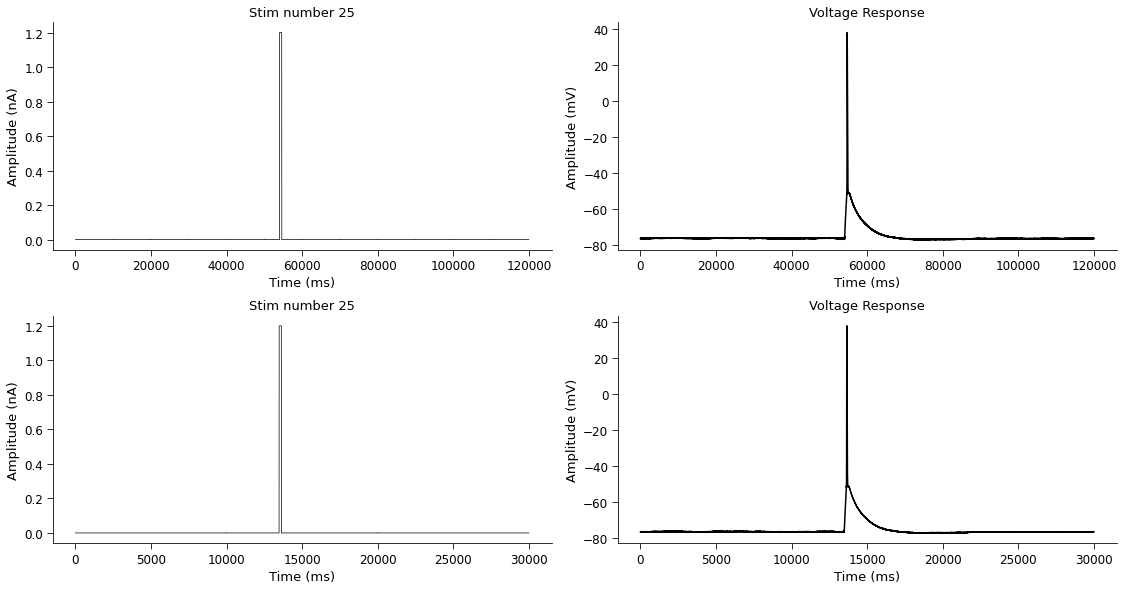


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


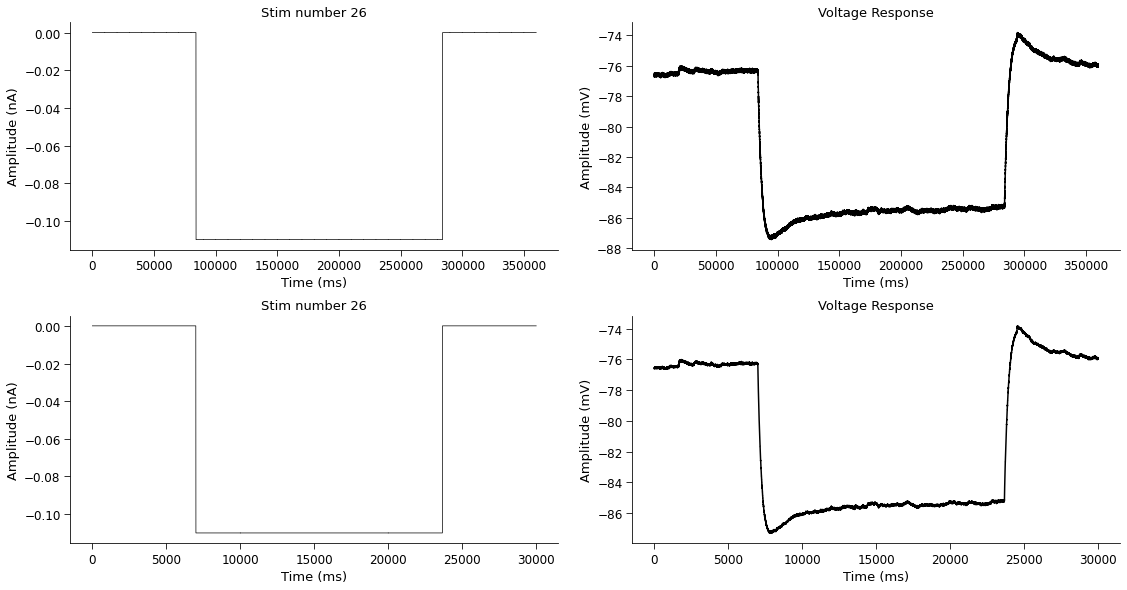


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


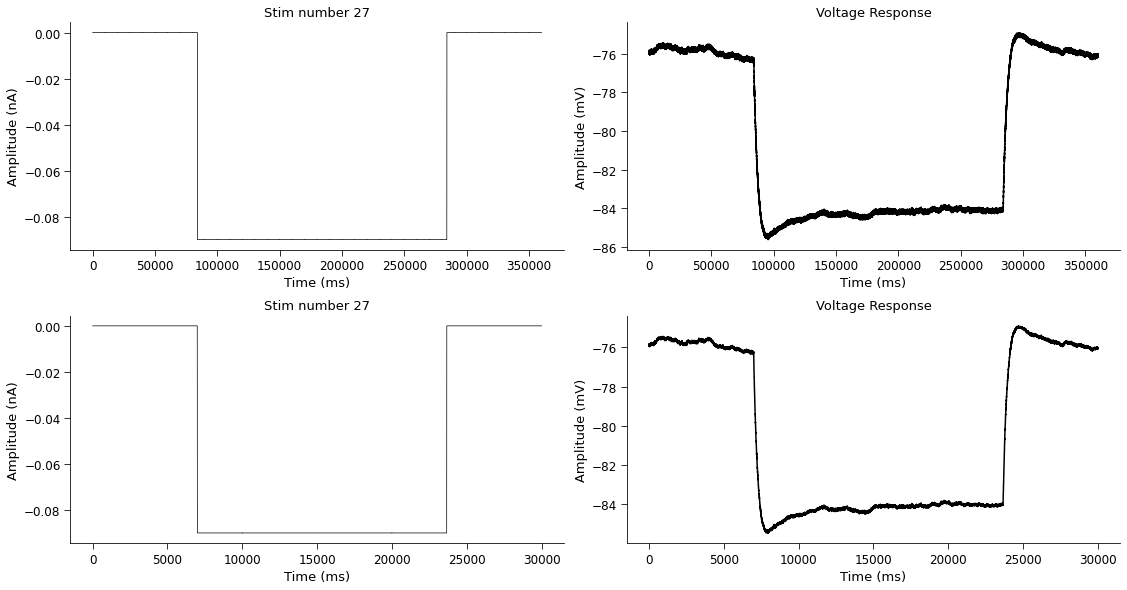


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


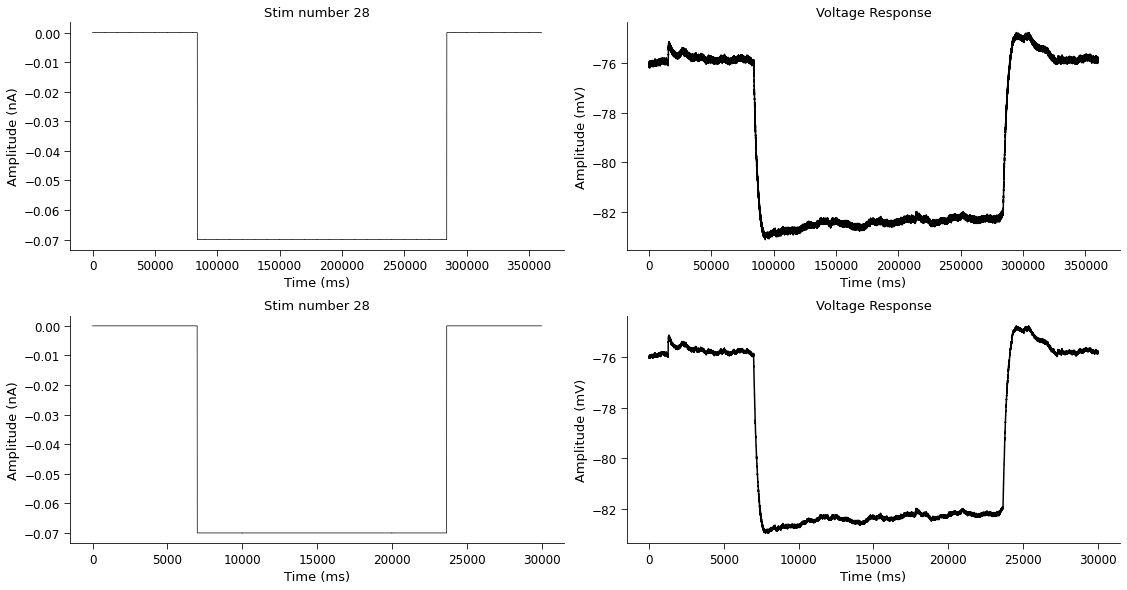


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


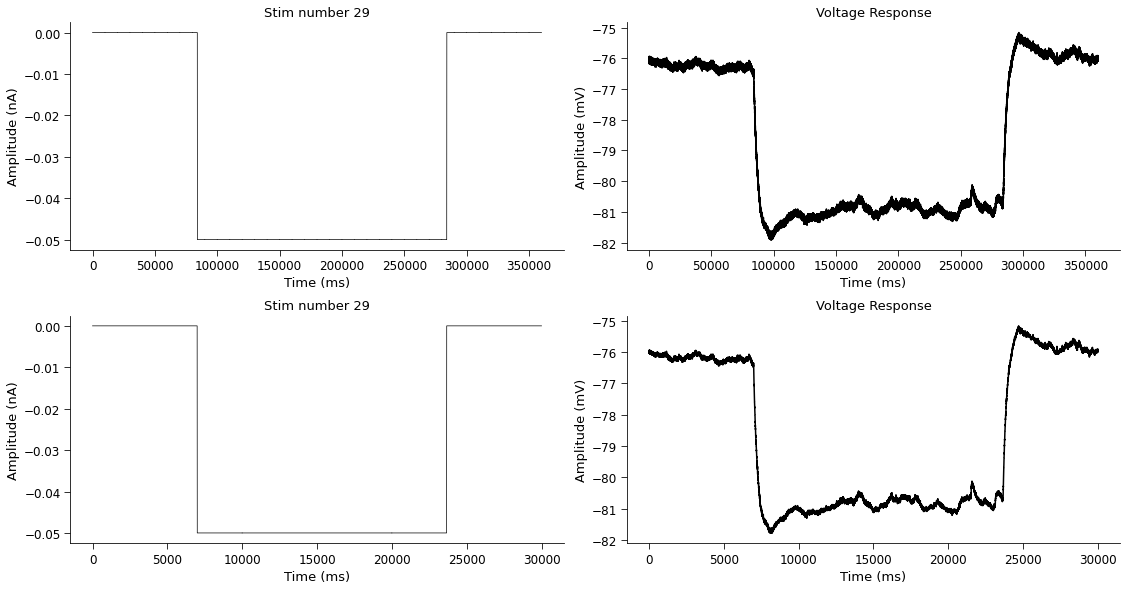


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


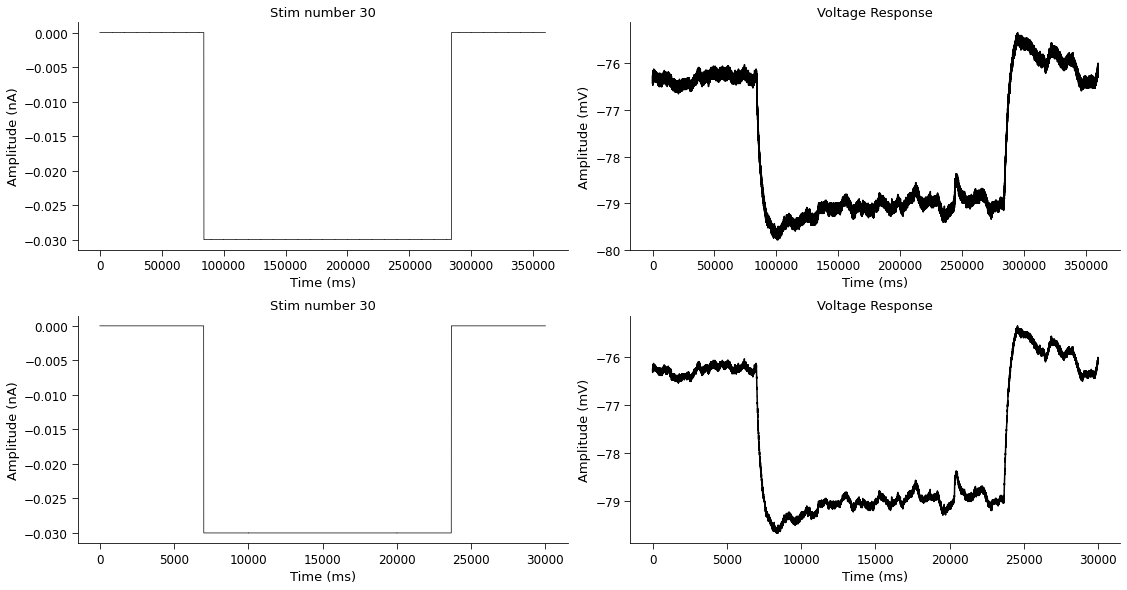


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


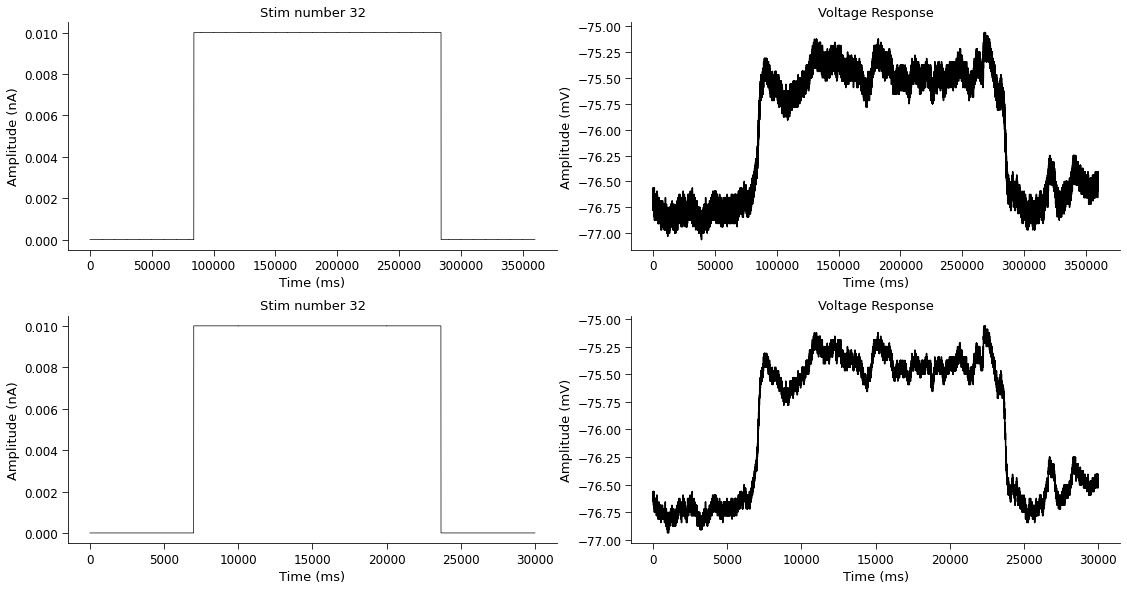


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


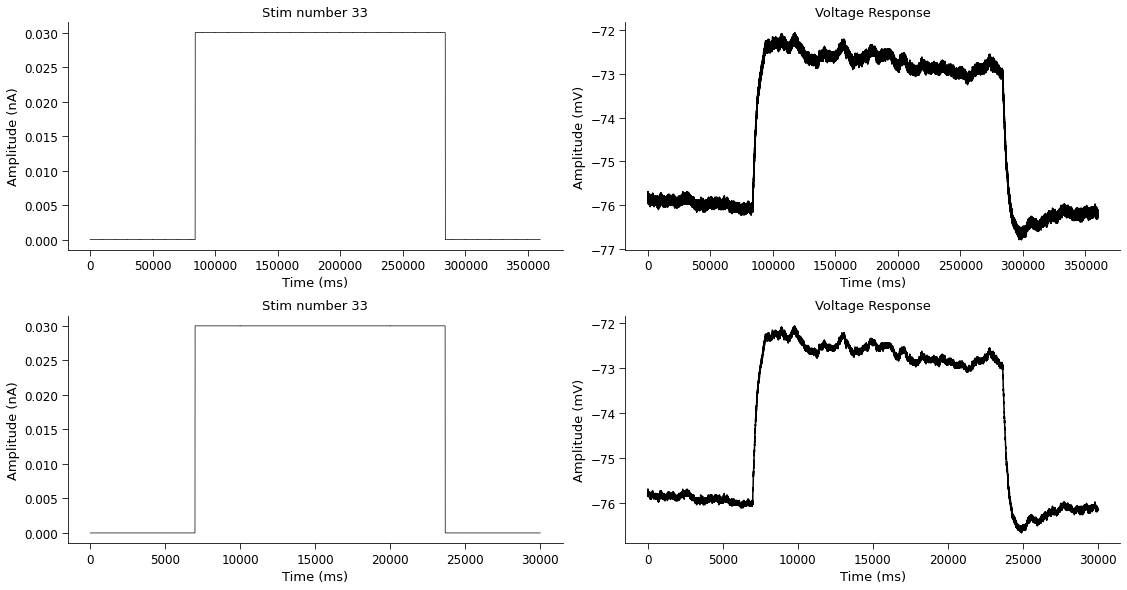


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


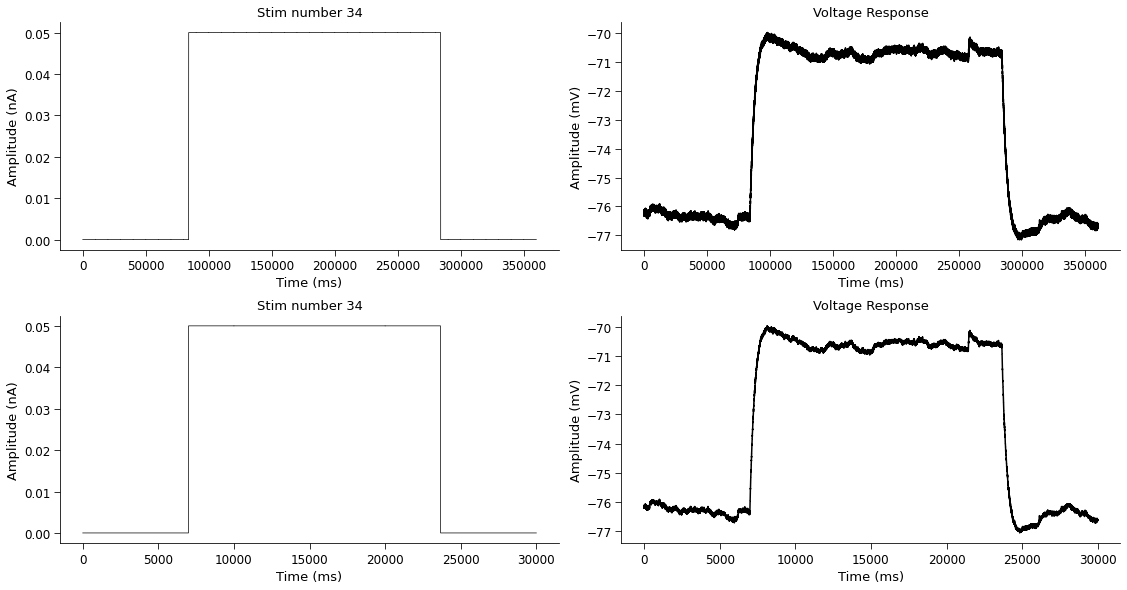


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


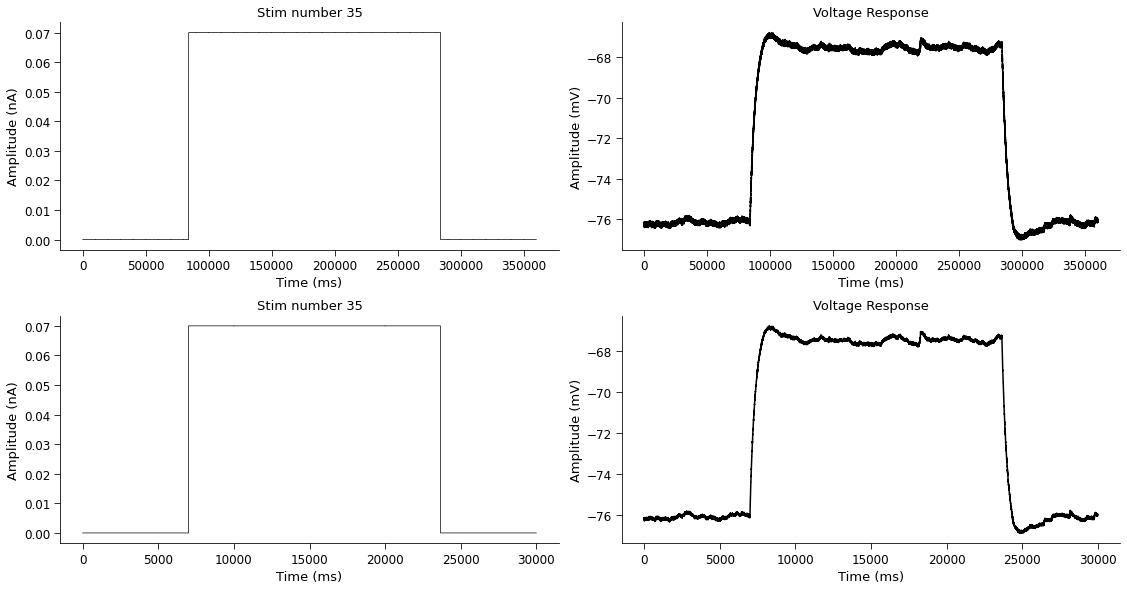


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


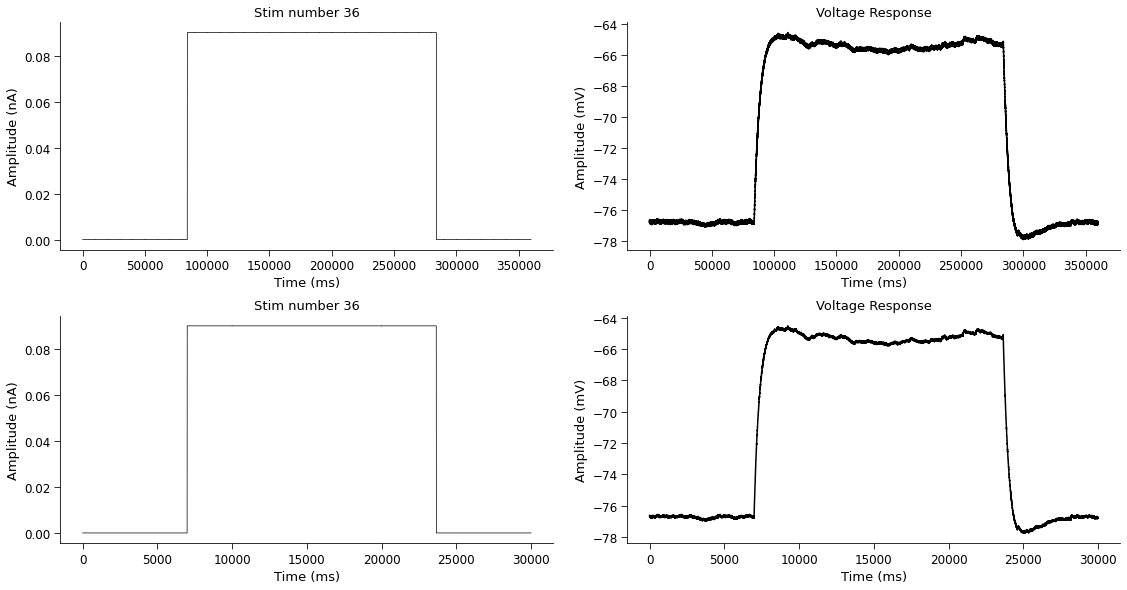


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


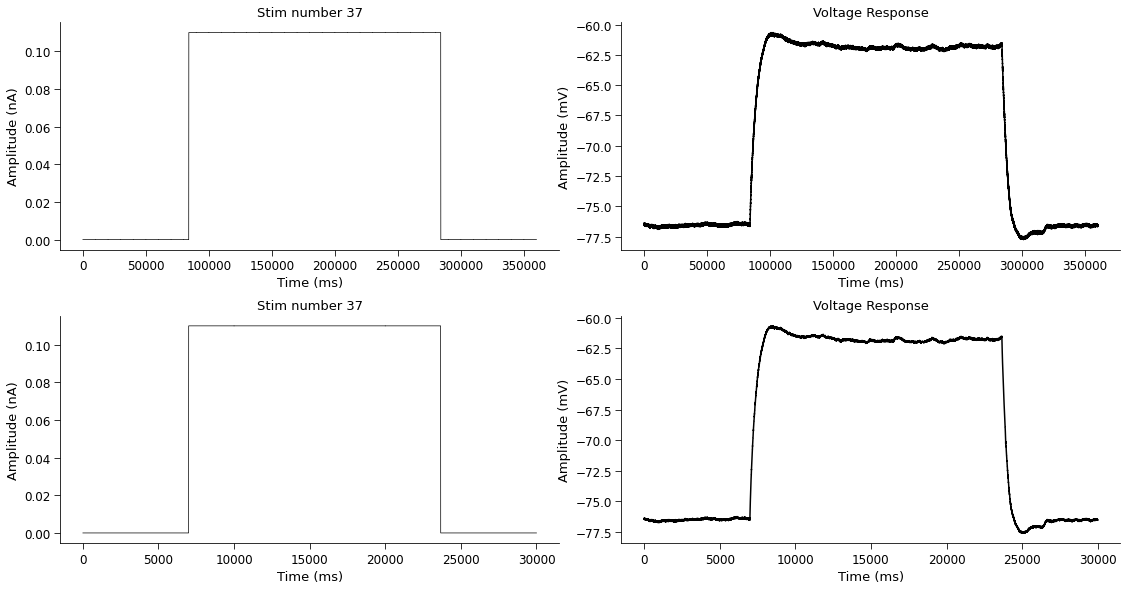


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


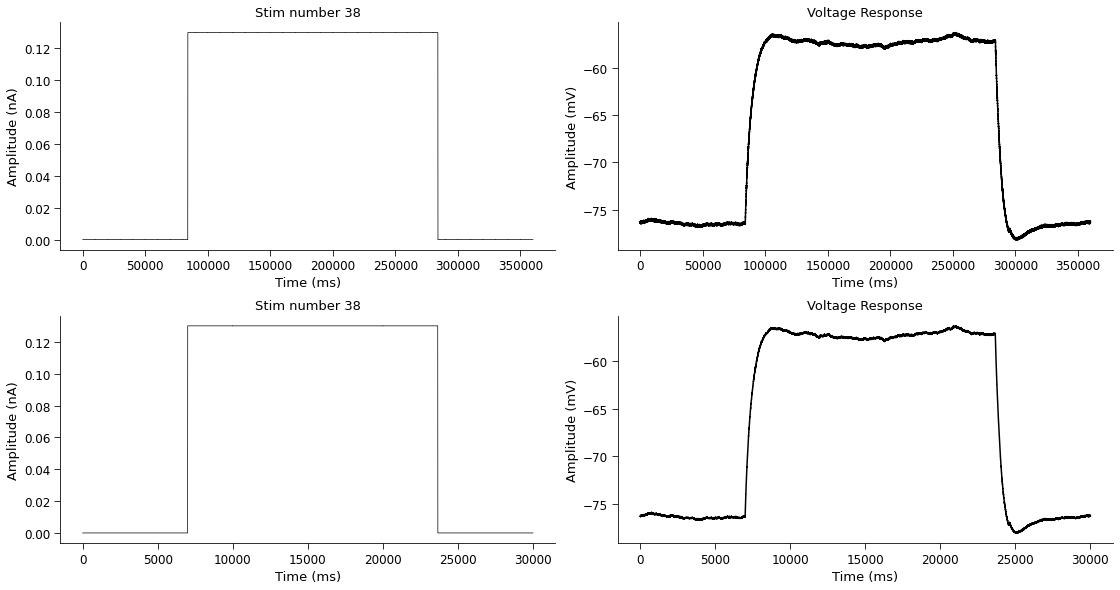


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


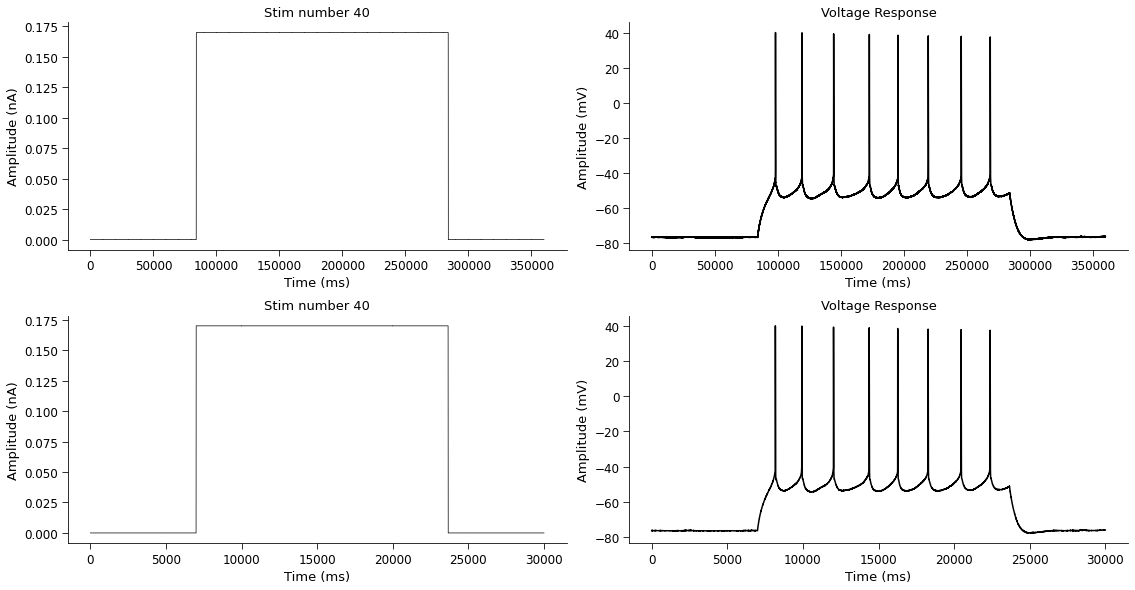


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


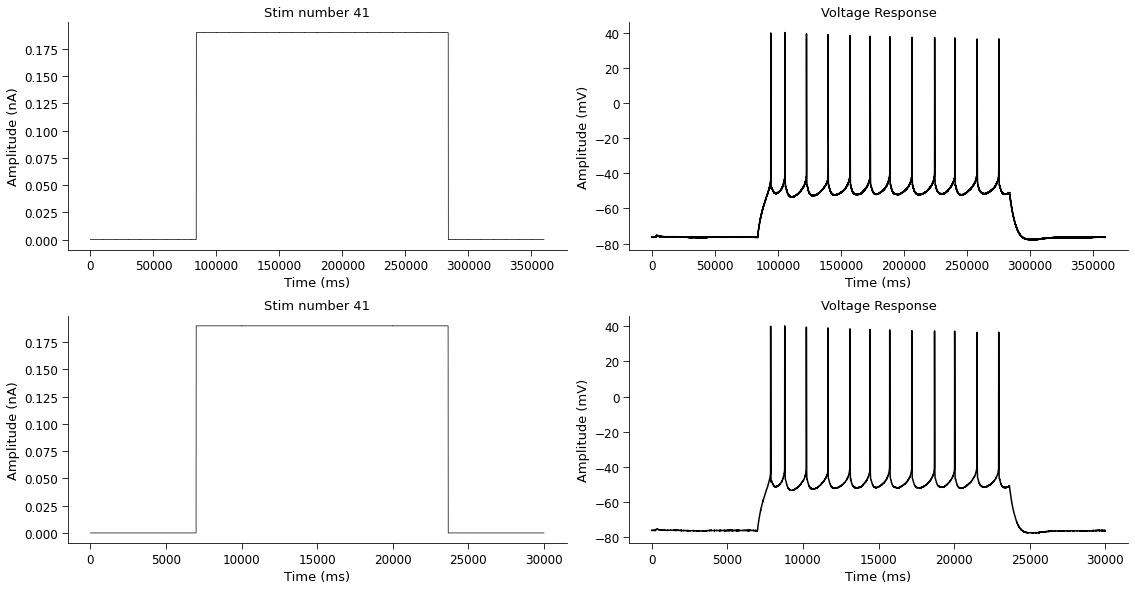


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


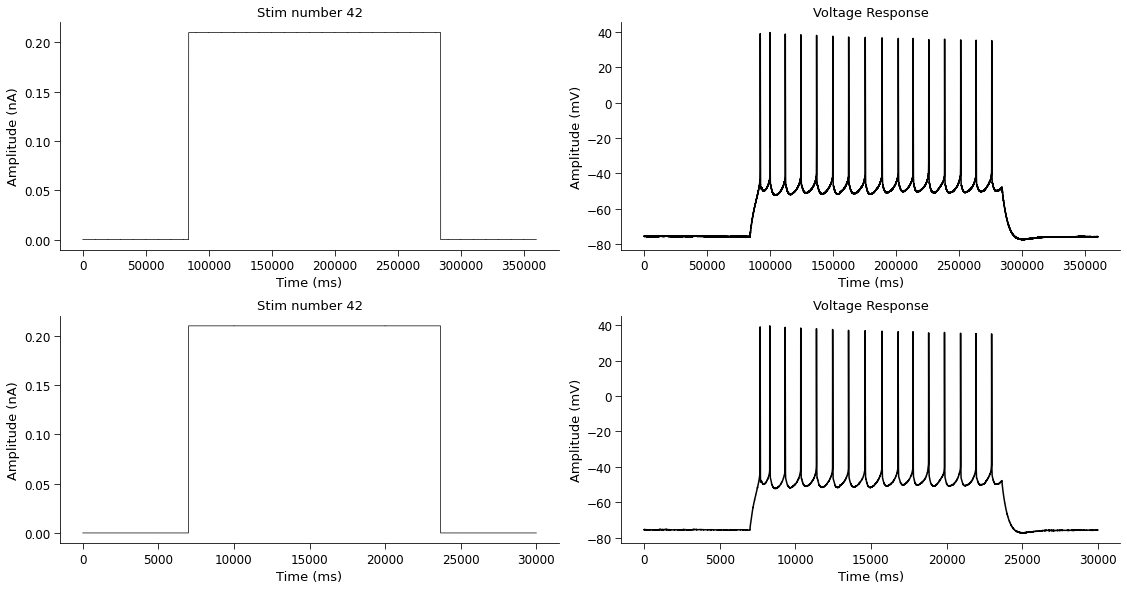


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


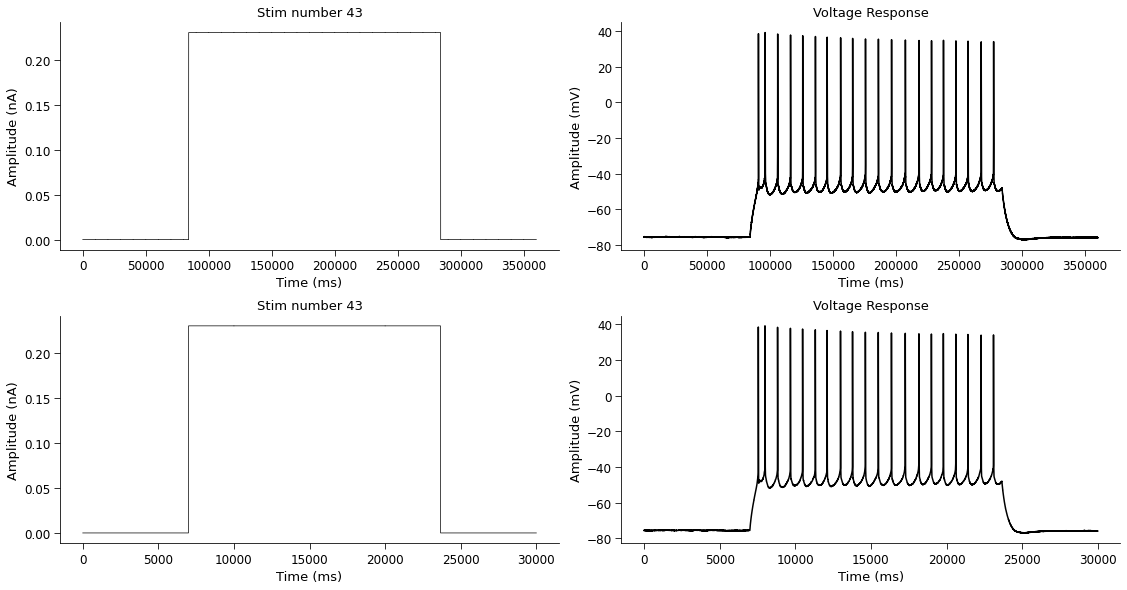


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


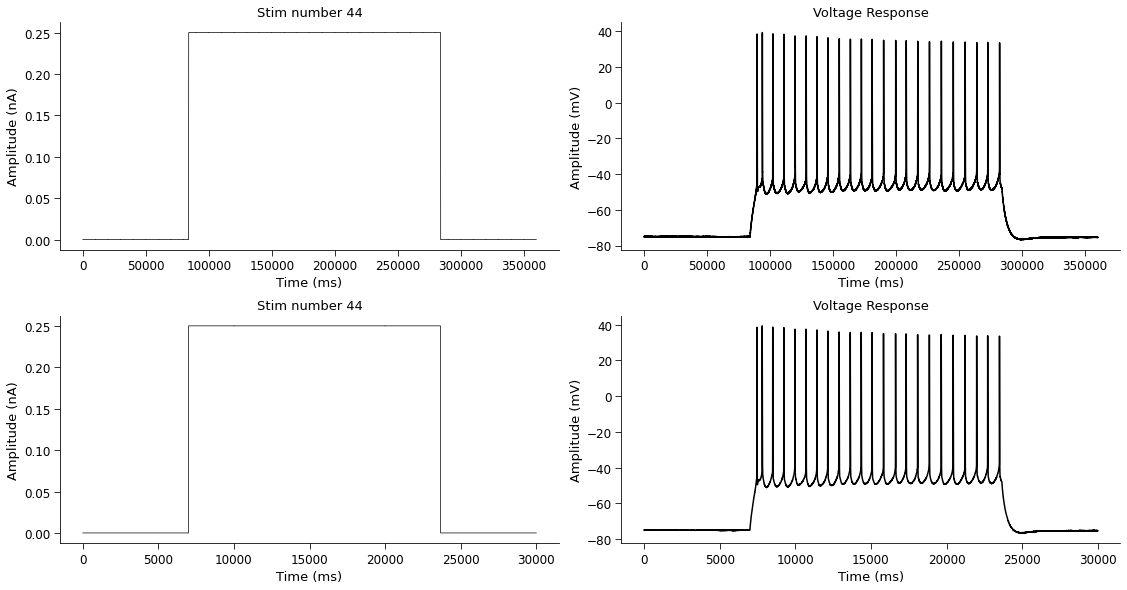


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


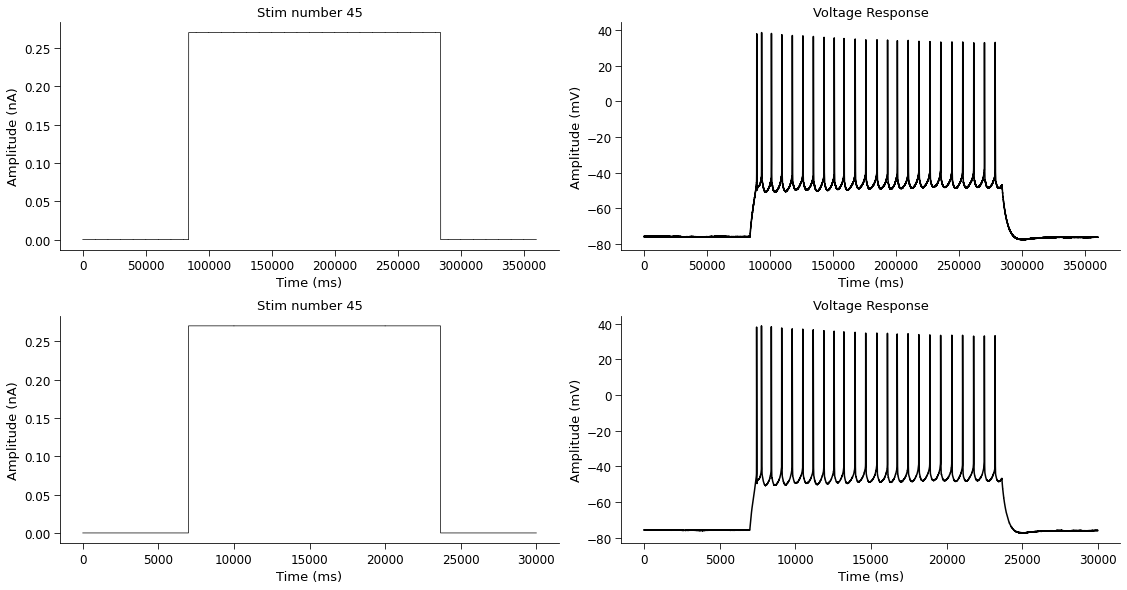


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


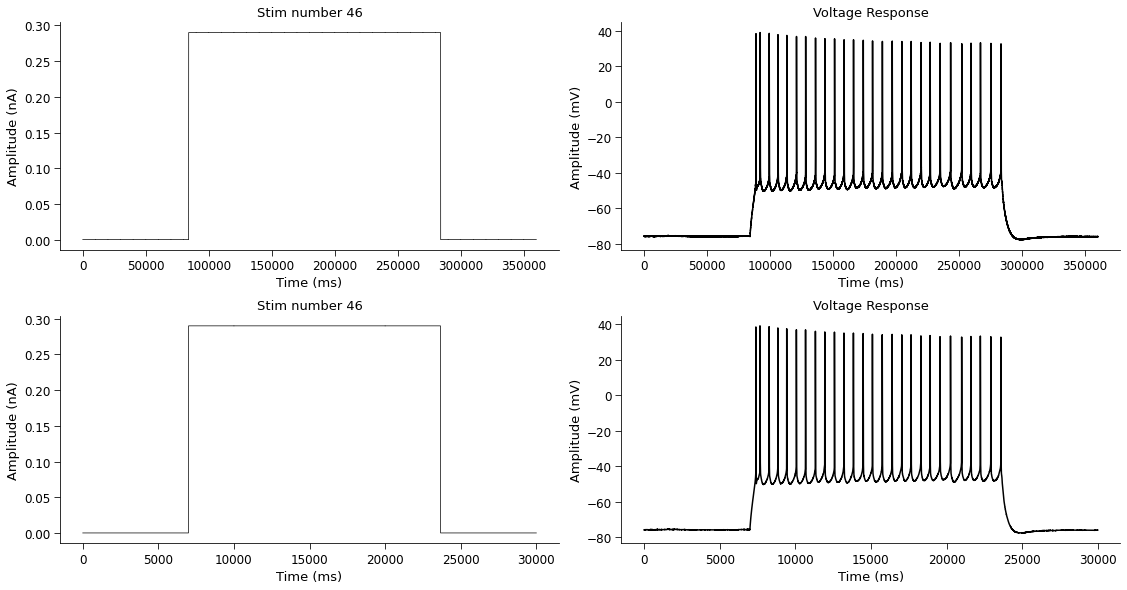


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


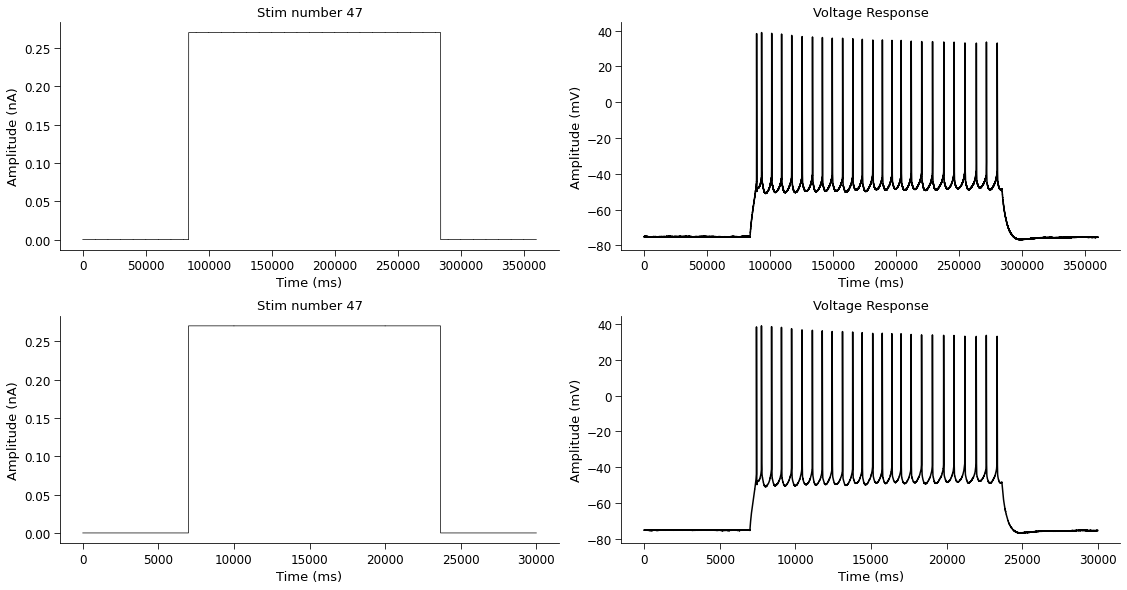


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


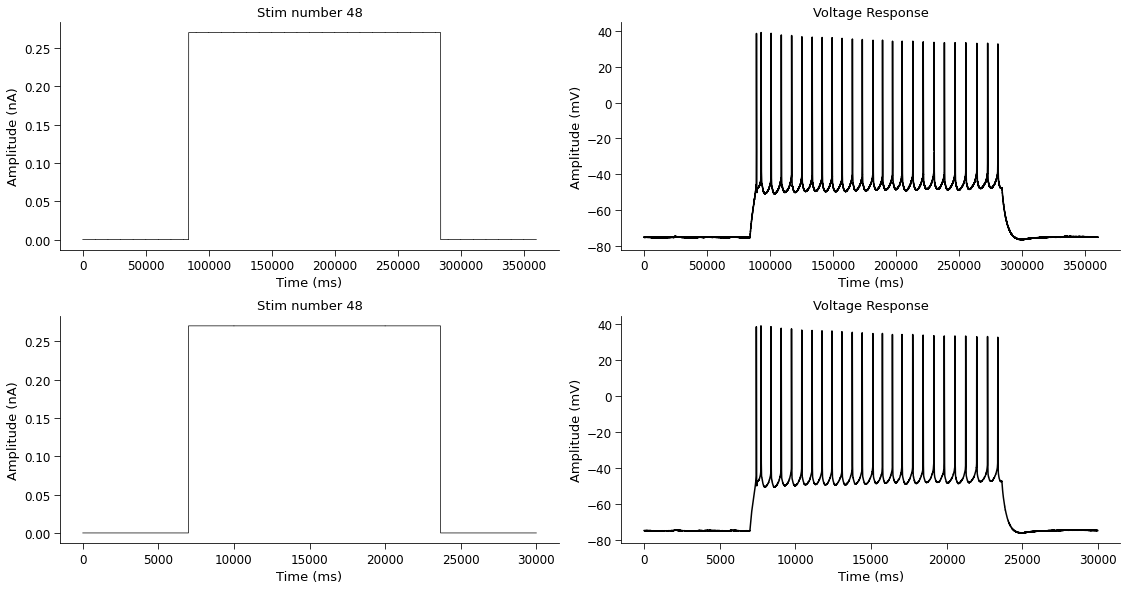


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


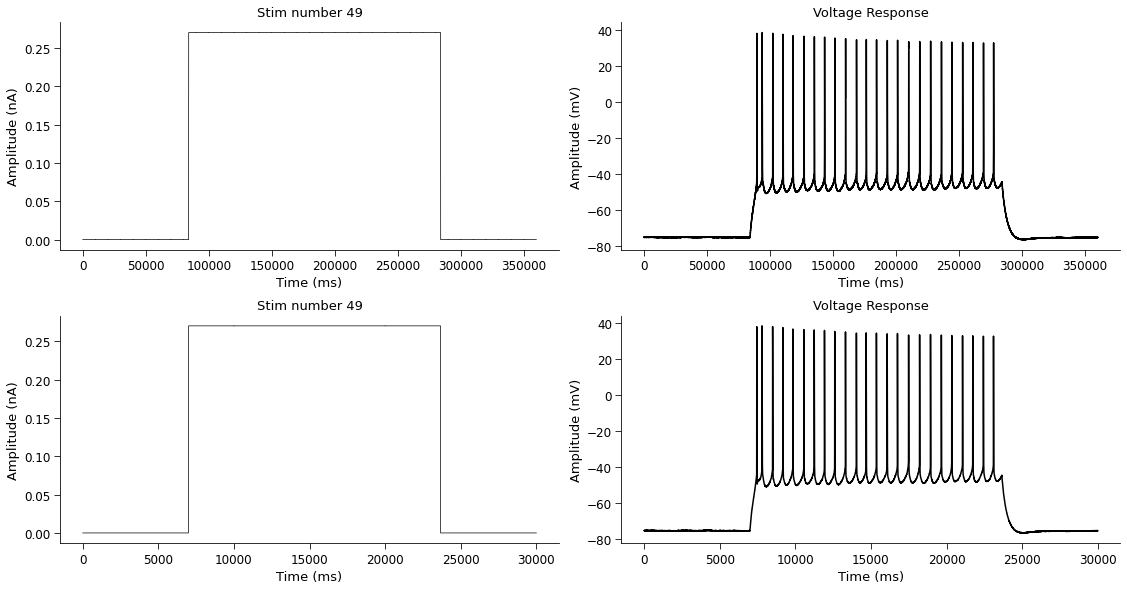


 

Stim kind: Long Square
dt for sampled stim: 0.060000000000000005 ms
dt for sampled stim: 0.060000000000000005 ms


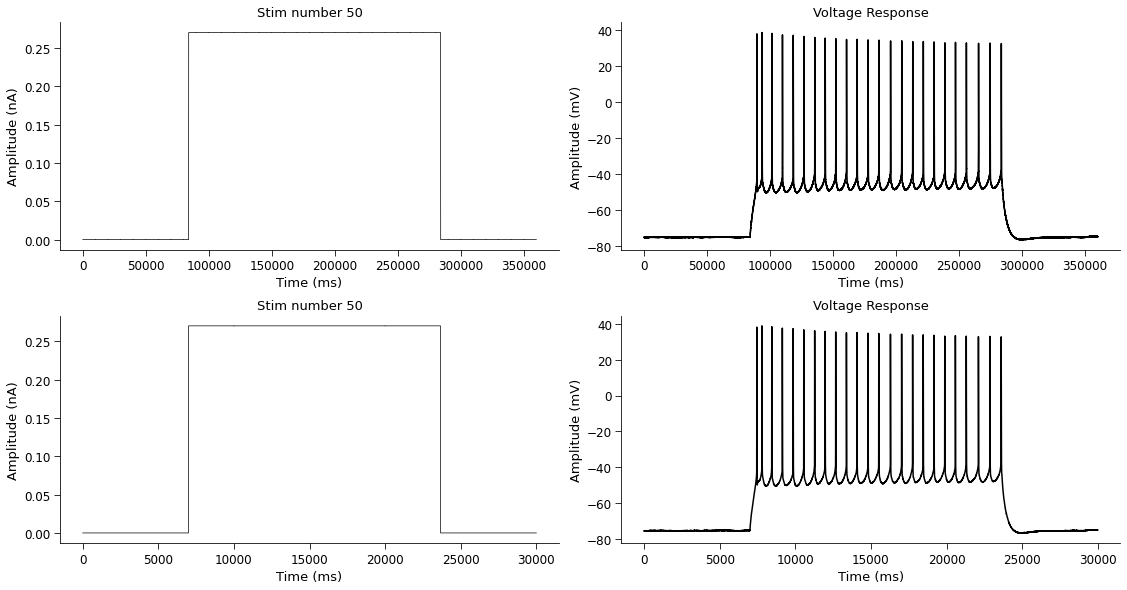


 

Stim kind: Noise 2
dt for sampled stim: 0.19 ms
dt for sampled stim: 0.19 ms
dt for sampled stim: 0.165 ms
dt for sampled stim: 0.165 ms
dt for sampled stim: 0.165 ms
dt for sampled stim: 0.165 ms


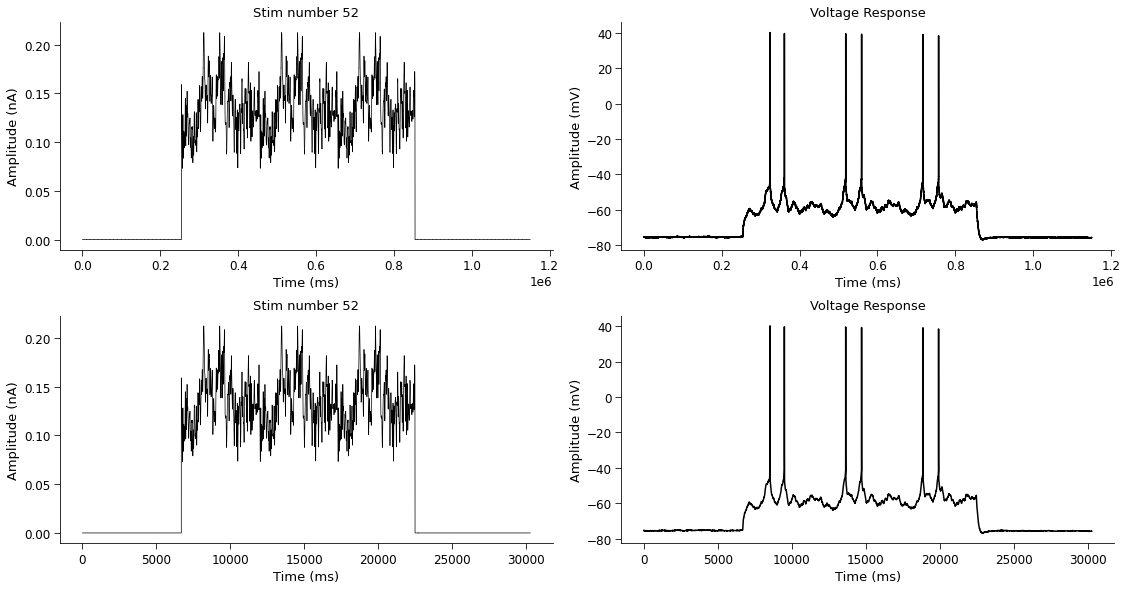

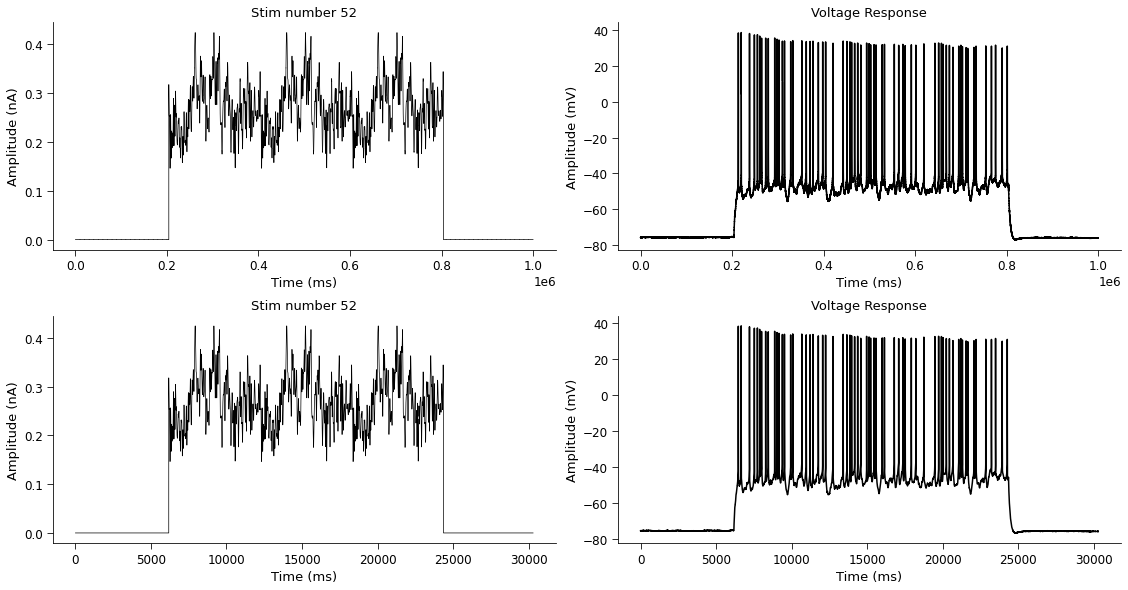

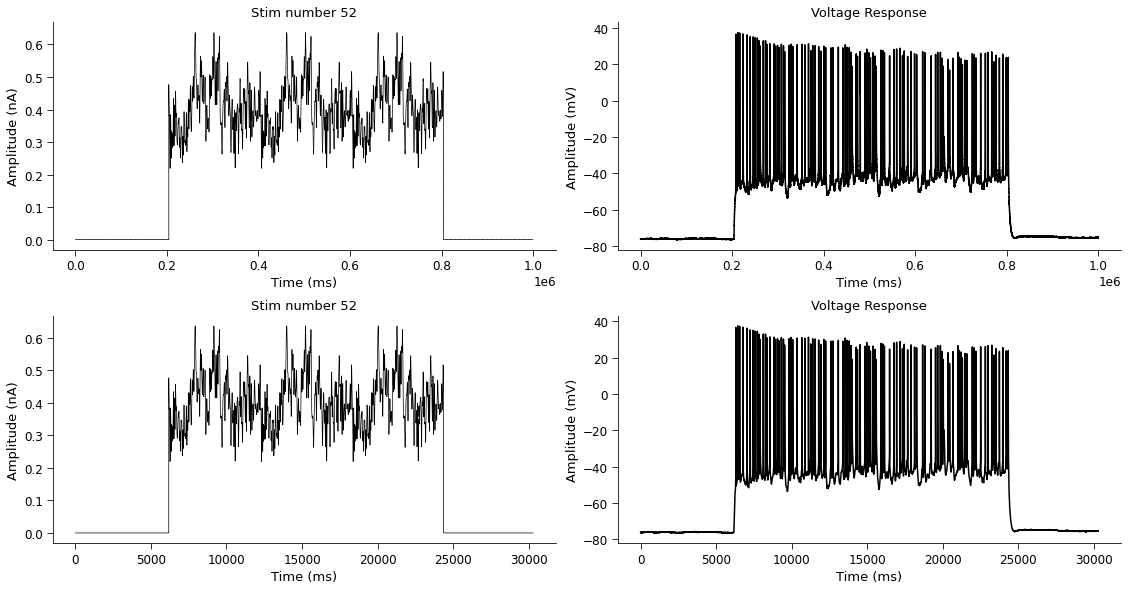


 

Stim kind: Noise 1
dt for sampled stim: 0.19 ms
dt for sampled stim: 0.19 ms
dt for sampled stim: 0.165 ms
dt for sampled stim: 0.165 ms
dt for sampled stim: 0.165 ms
dt for sampled stim: 0.165 ms


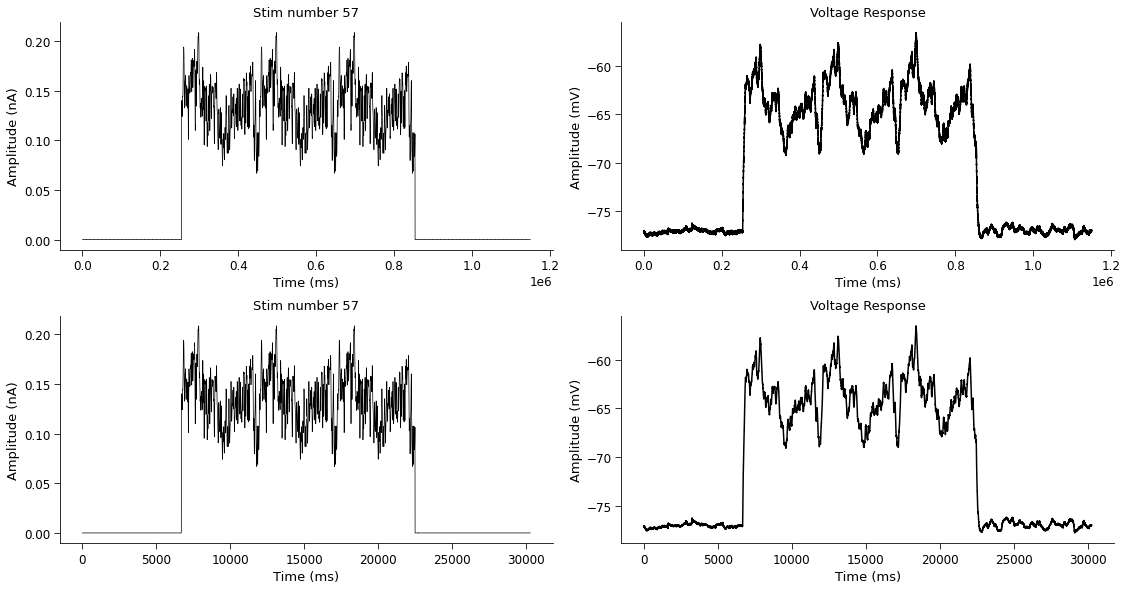

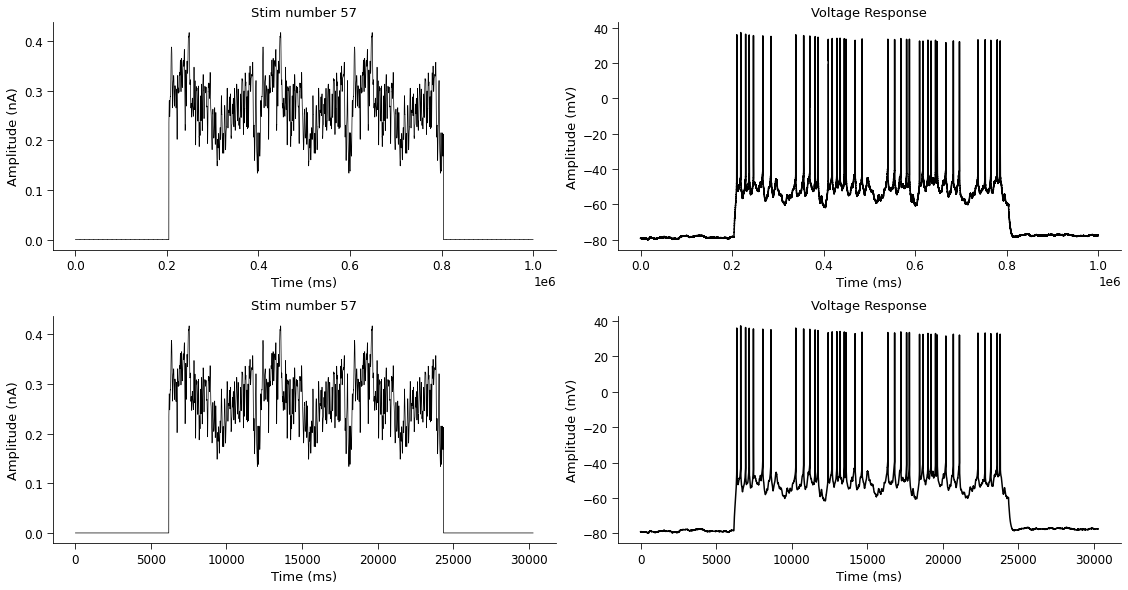

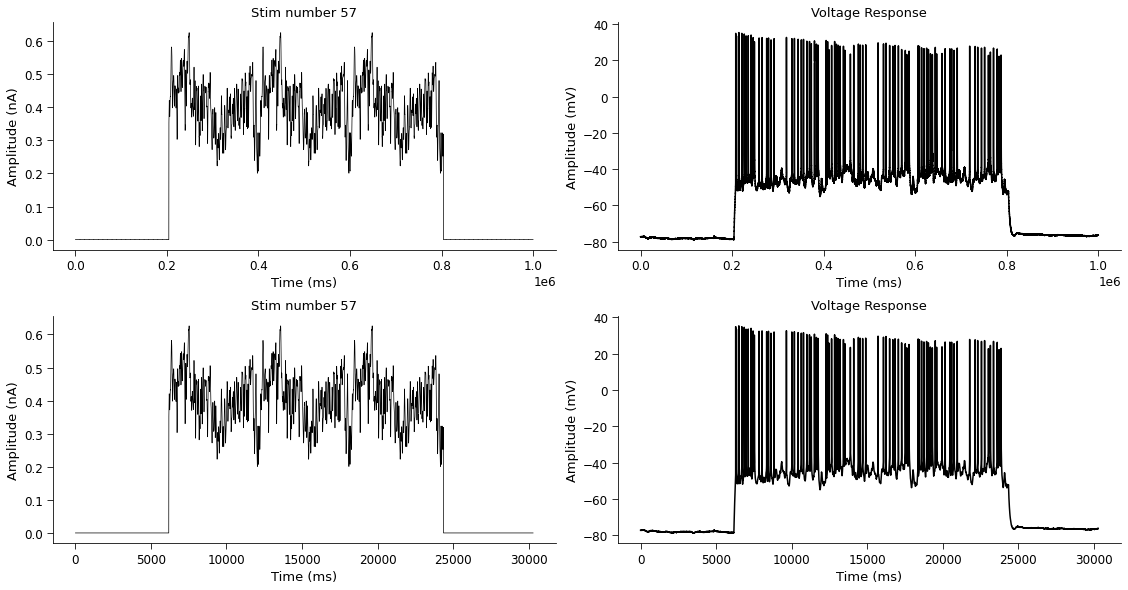


 

Stim kind: Noise 2
dt for sampled stim: 0.19 ms
dt for sampled stim: 0.19 ms
dt for sampled stim: 0.165 ms
dt for sampled stim: 0.165 ms
dt for sampled stim: 0.165 ms
dt for sampled stim: 0.165 ms


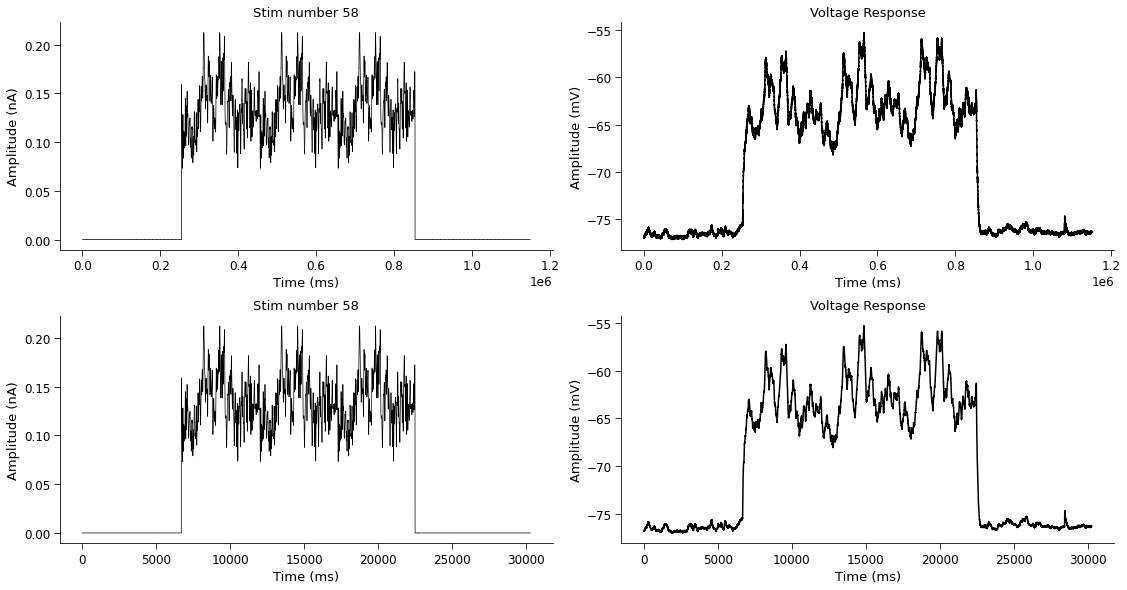

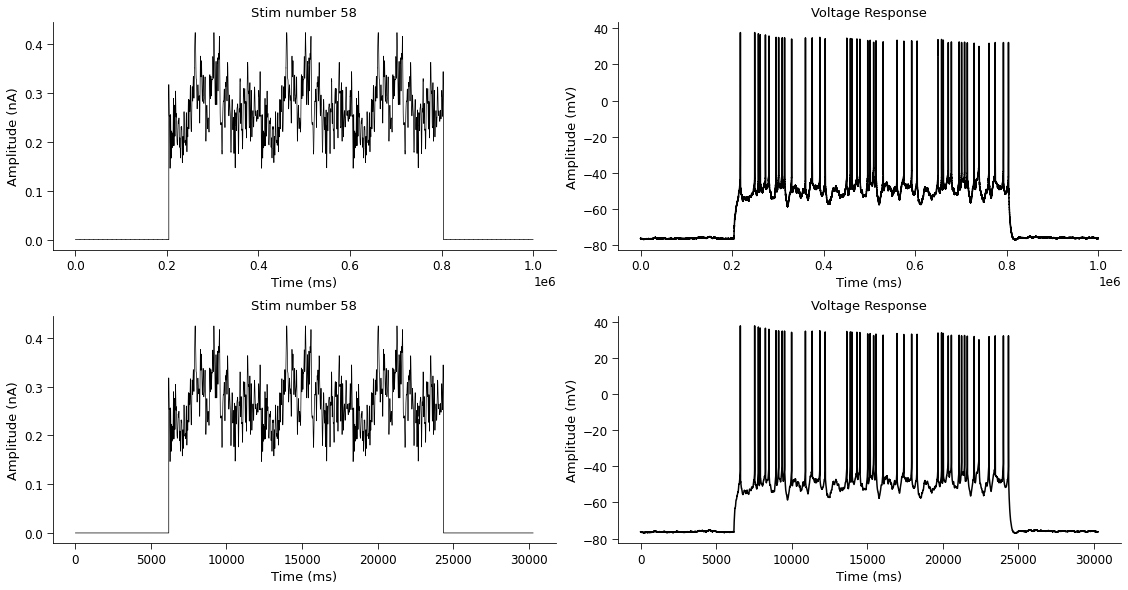

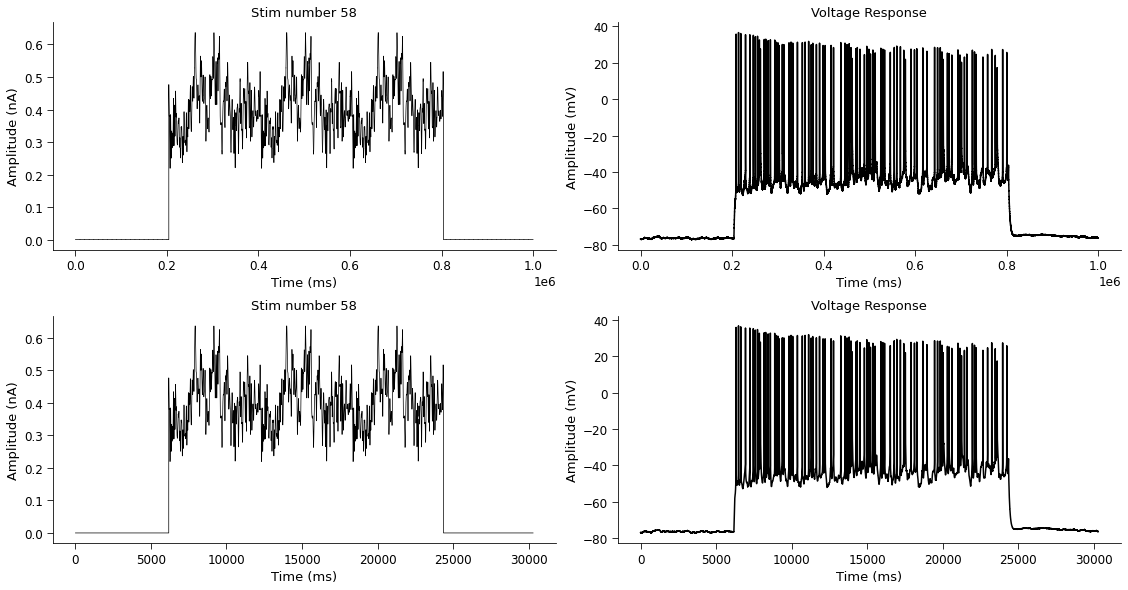


 

Stim kind: Square - 2s Suprathreshold
dt for sampled stim: 0.095 ms
dt for sampled stim: 0.095 ms


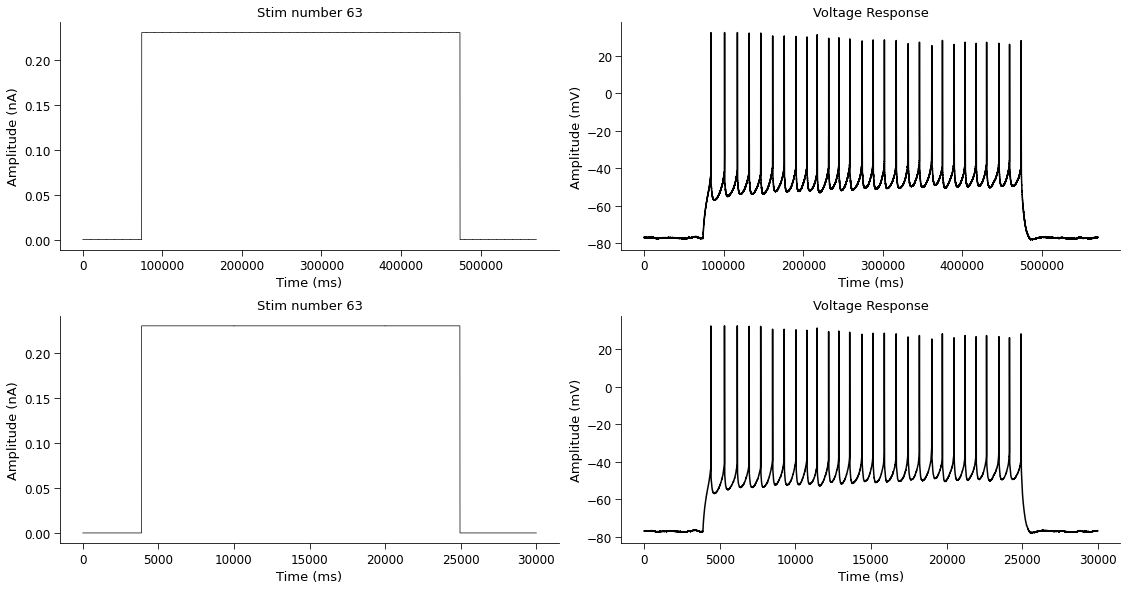


 

Stim kind: Square - 2s Suprathreshold
dt for sampled stim: 0.095 ms
dt for sampled stim: 0.095 ms


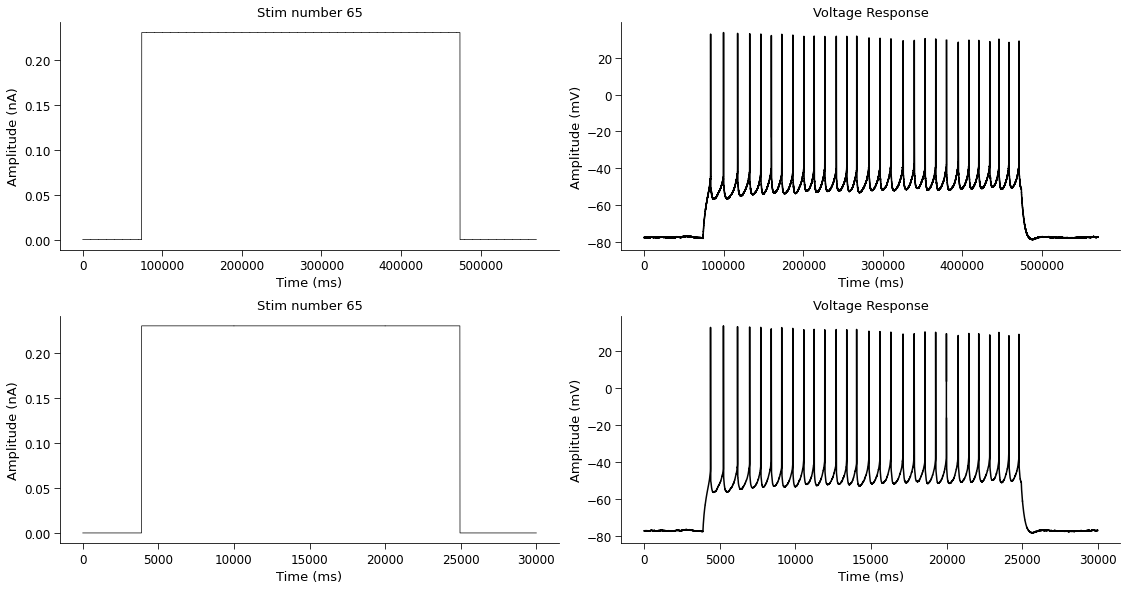


 

Stim kind: Square - 2s Suprathreshold
dt for sampled stim: 0.095 ms
dt for sampled stim: 0.095 ms


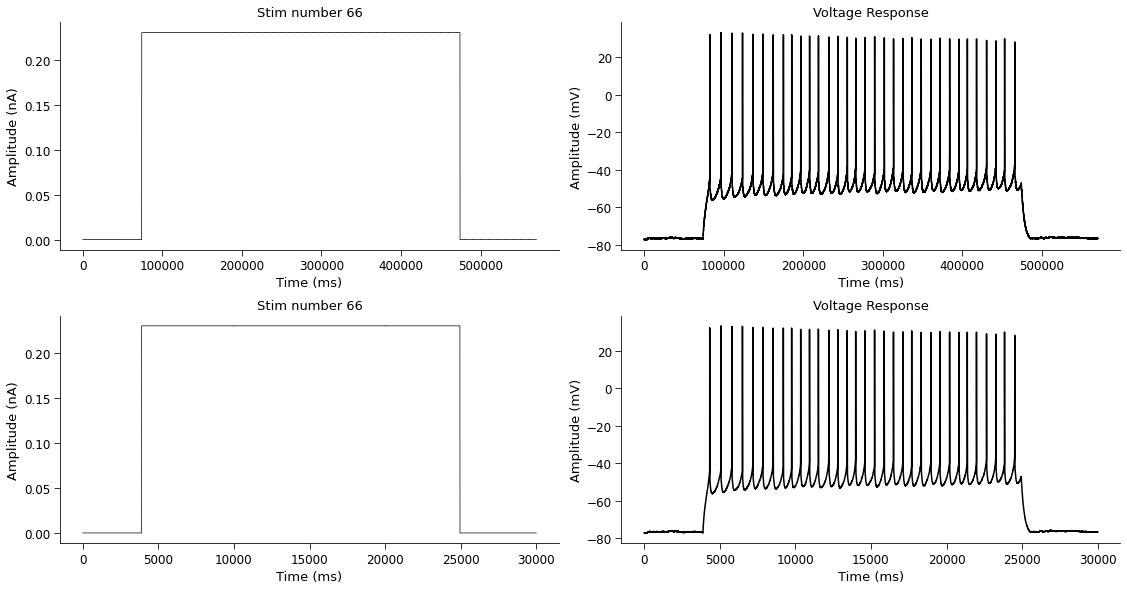


 

Stim kind: Square - 2s Suprathreshold
dt for sampled stim: 0.095 ms
dt for sampled stim: 0.095 ms


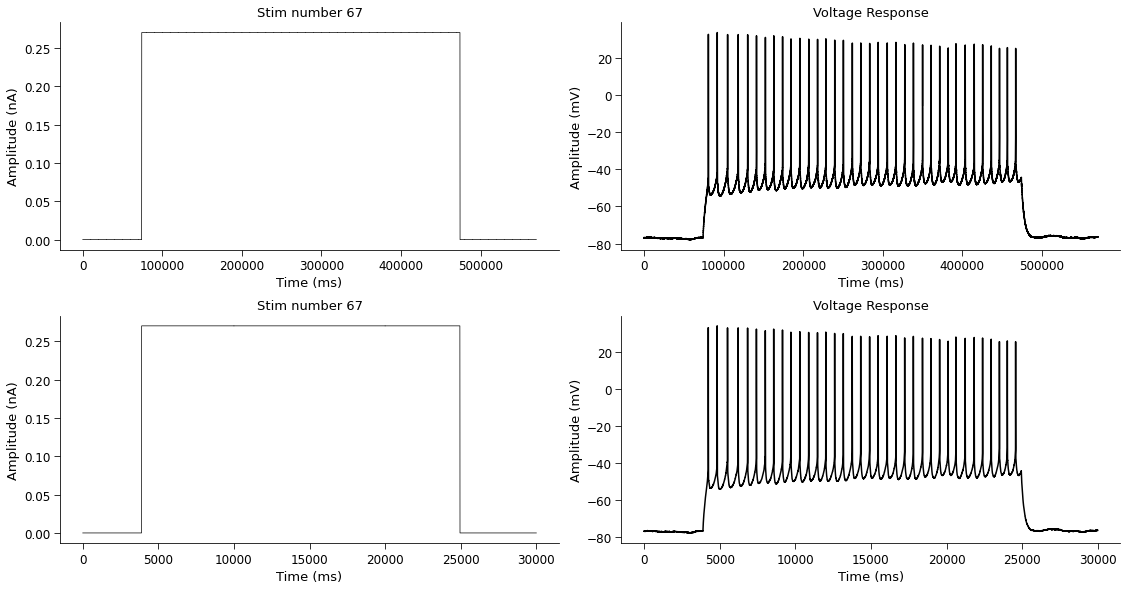


 

Stim kind: Test
70


In [17]:
if os.path.isfile(stim_file_path):
    os.remove(stim_file_path)
    
if os.path.isfile(volts_file_path):
    os.remove(volts_file_path)
    
stims_hdf5 = h5py.File(stim_file_path, 'w')
volts_hdf5 = h5py.File(volts_file_path, 'w')
keys = []
stim_kinds = []
for sweep_number in sweeps_to_keep:
    sweep_data = data_set.get_sweep(sweep_number)
    stimulus = sweep_data['stimulus']*10**9
    response = sweep_data['response']*10**3
    sampling_rate = sweep_data['sampling_rate']
    meta_data = data_set.get_sweep_metadata(sweep_number)
    stim_kind = meta_data['aibs_stimulus_name']
    if type(stim_kind) == bytes: 
        stim_kind = stim_kind.decode('ASCII')
    print('Stim kind: '+ stim_kind)
        
    if stim_kind in sweeps_to_drop or len(response) == 0:
        sweep_numbers.remove(int(sweep_number))
        continue
    if 'Test' in stim_kind:
        print(sweep_number)
    if 'Short Square - Triple' in stim_kind:
        if sweep_number == 81:
            stimulus = filtr(stimulus, short_sq_tri_81_ind)
            response = filtr(response, short_sq_tri_81_ind)
        elif sweep_number == 82:
            stimulus = filtr(stimulus, short_sq_tri_82_ind)
            response = filtr(response, short_sq_tri_82_ind)
        elif sweep_number == 83:
            stimulus = filtr(stimulus, short_sq_tri_83_ind)
            response = filtr(response, short_sq_tri_83_ind)
        elif sweep_number == 84:
            stimulus = filtr(stimulus, short_sq_tri_84_ind)
            response = filtr(response, short_sq_tri_84_ind)
        elif sweep_number == 85:
            stimulus = filtr(stimulus, short_sq_tri_85_ind)
            response = filtr(response, short_sq_tri_85_ind)
        else:
            stimulus = filtr(stimulus, short_sq_tri_82_ind)
            response = filtr(response, short_sq_tri_82_ind)
    if 'Short Square' in stim_kind and not '- Triple' in stim_kind:
        stimulus = filtr(stimulus, short_sq_ind)
        response = filtr(response, short_sq_ind)
    if 'Long Square' in stim_kind:
        stimulus = filtr(stimulus, long_sq_ind)
        response = filtr(response, long_sq_ind)
    if 'Ramp to Rheobase' in stim_kind:
        stimulus = filtr(stimulus, ramp_to_rheo_ind)
        response = filtr(response, ramp_to_rheo_ind)
    if 'Ramp' in stim_kind and not 'Rheobase' in stim_kind:
        stimulus = filtr(stimulus, ramp_ind)
        response = filtr(response, ramp_ind)
    if 'Square - 0.5ms Subthreshold' in stim_kind:
        stimulus = filtr(stimulus, sq_0_5_ind)
        response = filtr(response, sq_0_5_ind)
    if 'Square - 2s Suprathreshold' in stim_kind:
        stimulus = filtr(stimulus, sq_2_ind)
        response = filtr(response, sq_2_ind)
    if not 'Noise' in stim_kind and not 'Test' in stim_kind:
        sampled_stim, sample_dt_stim = sample(stimulus, final_len, True, sampling_rate)
        sampled_response, sample_dt = sample(response, final_len, False, sampling_rate)
        plot_sampled(sweep_number, stimulus, response, sampled_stim, sampled_response)
        try:
            assert len(sampled_response) > 1
            assert len(sampled_stim) > 1
            assert sample_dt_stim == sample_dt
        except:
            import pdb; pdb.set_trace()
        stims_hdf5.create_dataset(str(sweep_number), data=sampled_stim)
        stims_hdf5.create_dataset(str(sweep_number)+'_dt', data=np.array([sample_dt]))
        volts_hdf5.create_dataset(str(sweep_number), data=sampled_response)
        volts_hdf5.create_dataset(str(sweep_number)+'_dt', data=np.array([sample_dt]))
        keys.append(str(sweep_number))
        stim_kinds.append(stim_kind)
    if 'Noise' in stim_kind:
        # '''
        # IMPORTANT NOTE: HERE WE HAVE TURNED OFF PSLITTING NOISE INTO 3 STIMS
        # Uncomment to retain that feature
        # '''
        # stimulus1 = filtr(stimulus, full_noise_ind)
        # response1 = filtr(response, full_noise_ind)
        # sampled_stim1, sample_dt1 = sample(stimulus1, final_len, True, sampling_rate)
        # sampled_response1, sample_dt1 = sample(response1, final_len, False, sampling_rate)
        # plot_sampled(sweep_number, stimulus1, response1, sampled_stim1, sampled_response1)
        # stims_hdf5.create_dataset(str(sweep_number), data=sampled_stim1)
        # stims_hdf5.create_dataset(str(sweep_number)+'_dt', data=np.array([sample_dt1]))
        # volts_hdf5.create_dataset(str(sweep_number), data=sampled_response1)
        # volts_hdf5.create_dataset(str(sweep_number)+'_dt', data=np.array([sample_dt1]))
        # keys.append(str(sweep_number))
        stimulus1 = filtr(stimulus, noise_ind_1)
        response1 = filtr(response, noise_ind_1)
        stimulus2 = filtr(stimulus, noise_ind_2)
        response2 = filtr(response, noise_ind_2)
        stimulus3 = filtr(stimulus, noise_ind_3)
        response3 = filtr(response, noise_ind_3)
        sampled_stim1, sample_dt1 = sample(stimulus1, final_len, True, sampling_rate)
        sampled_response1, sample_dt1 = sample(response1, final_len, False, sampling_rate)
        sampled_stim2, sample_dt2 = sample(stimulus2, final_len, True, sampling_rate)
        sampled_response2, sample_dt2 = sample(response2, final_len, False, sampling_rate)
        sampled_stim3, sample_dt3 = sample(stimulus3, final_len, True, sampling_rate)
        sampled_response3, sample_dt3 = sample(response3, final_len, False, sampling_rate)
        plot_sampled(sweep_number, stimulus1, response1, sampled_stim1, sampled_response1)
        plot_sampled(sweep_number, stimulus2, response2, sampled_stim2, sampled_response2)
        plot_sampled(sweep_number, stimulus3, response3, sampled_stim3, sampled_response3)
        
        stims_hdf5.create_dataset(str(sweep_number)+'1', data=sampled_stim1)
        stims_hdf5.create_dataset(str(sweep_number)+'1_dt', data=np.array([sample_dt1]))
        volts_hdf5.create_dataset(str(sweep_number)+'1', data=sampled_response1)
        volts_hdf5.create_dataset(str(sweep_number)+'1_dt', data=np.array([sample_dt1]))
        stims_hdf5.create_dataset(str(sweep_number)+'2', data=sampled_stim2)
        stims_hdf5.create_dataset(str(sweep_number)+'2_dt', data=np.array([sample_dt2]))
        volts_hdf5.create_dataset(str(sweep_number)+'2', data=sampled_response2)
        volts_hdf5.create_dataset(str(sweep_number)+'2_dt', data=np.array([sample_dt2]))
        stims_hdf5.create_dataset(str(sweep_number)+'3', data=sampled_stim3)
        stims_hdf5.create_dataset(str(sweep_number)+'3_dt', data=np.array([sample_dt3]))
        volts_hdf5.create_dataset(str(sweep_number)+'3', data=sampled_response3)
        volts_hdf5.create_dataset(str(sweep_number)+'3_dt', data=np.array([sample_dt3]))
        keys.append(str(sweep_number)+'1')
        keys.append(str(sweep_number)+'2')
        keys.append(str(sweep_number)+'3')
        stim_kinds.append(stim_kind+'1')
        stim_kinds.append(stim_kind+'2')
        stim_kinds.append(stim_kind+'3')


        
stims_hdf5.create_dataset('sweep_numbers', data=sweep_numbers)
stims_hdf5.create_dataset('sweep_keys', data=np.string_(keys))
volts_hdf5.create_dataset('sweep_numbers', data=sweep_numbers)
volts_hdf5.create_dataset('sweep_keys', data=np.string_(keys))
volts_hdf5.create_dataset('stim_types', data=stim_kinds)

stims_hdf5.close()
volts_hdf5.close()


In [18]:
g = 1

In [19]:
# stims_hdf5.close()
# volts_hdf5.close()

In [19]:
type(stim_kind)

bytes

In [ ]:
bytes
